In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.io import readsav
from scipy import ndimage
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
# import math
import glob as glob
import seaborn as sns

# PyMC 4.0 imports
import pymc as pm
import aesara.tensor as at 
import aesara
import arviz as az
import pymc.sampling_jax
import pytensor.tensor as pt
import pytensor

import sys
sys.path.append('../')

from scipy import stats

import os

from funciones.opencube2 import opencube2
from funciones.func4 import tilt,elong,MFLUX,barys,set_ranges,sizes,sizes2
from funciones.modelcube import modelmag,modelmagf,modelmag2


/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pymc/sampling/jax.py:39: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


# Check list of ARS

In [4]:
DF0=pd.read_csv('./arangosx.csv',index_col=0)

In [5]:
#DF0=pd.read_csv('./arangosx.csv',delimiter=';',index_col=0)
#DF0.to_csv('./arangosx.csv')

In [6]:
dic=readsav('../STATS-COFFEE/statsg.sav')

In [7]:
dic.keys()

dict_keys(['arsname', 'latitude', 'time', 'taun', 'taucn', 'tlcn', 'nt', 'ort', 'epn', 'enn', 'emn', 'maxflux'])

In [8]:
dic.time

array([b'7-Jul-1996 06:28:05.320', b'9-Aug-1996 12:48:04.510',
       b'4-Feb-1997 17:36:04.320', b'24-Jun-1997 16:00:05.380',
       b'9-Jul-1997 09:36:04.030', b'11-Dec-1997 11:15:04.383',
       b'1-Jan-1998 04:51:03.930', b'25-Feb-1998 00:00:03.150',
       b'26-Feb-1998 06:24:03.160', b'28-Feb-1998 09:36:03.160',
       b'8-Apr-1998 03:12:03.680', b'23-May-1998 04:47:04.637',
       b'7-Dec-1998 03:12:04.309', b'9-Dec-1998 08:03:04.265',
       b'2-Mar-1999 22:25:02.172', b'17-Mar-1999 17:36:02.395',
       b'28-Apr-1999 20:48:03.429', b'21-May-1999 16:00:03.603',
       b'14-Jun-1999 12:48:03.198', b'13-Jul-1999 07:59:02.509',
       b'28-Jul-1999 20:48:02.290', b'12-Sep-1999 08:03:02.412',
       b'14-Sep-1999 01:36:02.434', b'6-Oct-1999 11:12:02.932',
       b'6-Nov-1999 15:59:03.520', b'9-Nov-1999 01:39:03.529',
       b'10-Nov-1999 14:24:03.529', b'14-Dec-1999 23:59:02.913',
       b'16-Jan-2000 12:47:02.194', b'21-Jan-2000 12:51:02.143',
       b'3-Feb-2000 04:47:02.134', b'

In [9]:
def searchar(name):
    
    name=name.encode()

    matches = []
    dic=readsav('../STATS-COFFEE/stats.sav')

    for match in list(dic.arsname):
        a=0
        if name in match:
            a=1
        matches.append(a)

    ind=matches.index(1)
    
    print('nt',dic.nt[ind])
    print('time',dic.time[ind])
    print('lat',dic.latitude[ind])
    
    return dic.time[ind].decode(),dic.latitude[ind]

In [10]:
ars=DF0['AR'].values

In [11]:
times=[]
lat=[]

for name in ars:
    a,b = searchar(str(name))
    times.append(a)
    lat.append(b)

nt 0.22970201
time b'23-Sep-2002 03:11:01.323'
lat 6
nt 0.27008736
time b'29-Mar-2003 20:48:00.534'
lat -7
nt 0.099744365
time b'27-Apr-2003 19:12:00.360'
lat 16
nt -0.3175573
time b'11-Jun-2003 11:10:59.370'
lat -18
nt -0.100707754
time b'7-Mar-2004 09:39:03.290'
lat -11
nt -0.22048052
time b'3-May-2006 14:23:01.490'
lat 16
nt 0.5028164
time b'17-Jul-2006 20:48:01.690'
lat -5
nt 0.2560891
time b'29-Sep-2007 14:23:02.000'
lat 3
nt -0.20700613
time b'5-Jul-2009 00:00:02.110'
lat -25
nt 0.8990149
time b'25-Sep-1997 17:39:03.330'
lat -28
nt 0.39810258
time b'11-Dec-1997 11:15:04.383'
lat 31
nt 0.18575855
time b'1-Jan-1998 04:51:03.930'
lat -29
nt -0.8802456
time b'25-Feb-1998 00:00:03.150'
lat 17
nt 0.20348336
time b'26-Feb-1998 06:24:03.160'
lat -27
nt 0.38754737
time b'28-Feb-1998 09:36:03.160'
lat -24
nt 0.32787043
time b'4-May-1998 06:24:04.386'
lat 28
nt -0.43080446
time b'23-May-1998 04:47:04.637'
lat 17
nt -0.4316836
time b'2-Mar-1999 22:25:02.172'
lat 20
nt -0.43070436
time b'14-J

In [12]:
import datetime as dt
import matplotlib.dates as mdates


x=[dt.datetime.strptime(d[0:round(len(d)/2-1)].replace('Jan',
                                    '01').replace('Feb',
                                        '02').replace('Mar',
                                            '03').replace('Apr',
                                                '04').replace('May',
                                                    '05').replace('Jun',
                                                        '06').replace('Jul',
                                                        '07').replace('Aug',
                                                        '08').replace('Sep',
                                                        '09').replace('Oct',
                                                        '10').replace('Nov',
                                                        '11').replace('Dec',
                                                        '12')
                          ,'%d-%m-%Y').date() for d in times]
    

In [13]:
import calendar
timestamp1 = calendar.timegm(x[0].timetuple())



In [14]:
dt.date.fromtimestamp(timestamp1)

datetime.date(2002, 9, 22)

Text(0, 0.5, 'Latitude [deg]')

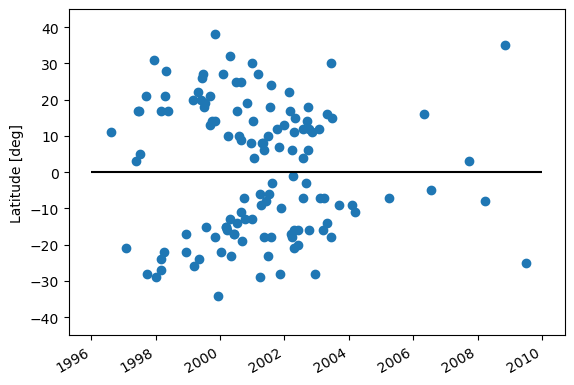

In [15]:


#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.scatter(x,lat,marker='o')
plt.gcf().autofmt_xdate()
plt.hlines(0,dt.datetime(1996,1,1),dt.datetime(2010,1,1),color='black')
plt.ylim(-45,45)
plt.ylabel('Latitude [deg]')

In [16]:
np.random.seed(54605)
emp = pd.DataFrame({'Count': [np.random.randint(15) for _ in range(50)],
                    'Dates': pd.to_datetime(
                                          np.random.choice(
                                              pd.date_range('2022-01-01', periods=50), 
                                          50)
                                      )
                   }, columns = ['Count','Dates'])

In [17]:
emp = pd.DataFrame({'Count': lat,
                    'Dates': x,
                    'secs':[calendar.timegm(h.timetuple()) for h in x],
                    'ARs':ars
                   }, columns = ['Count','Dates','secs','ARs'])

In [18]:
labelsd=[h.strftime("%Y-%m-%d") for h in pd.date_range('1996-01-01','2010-01-01',freq='2YS')]
labelst=[h.timestamp() for h in pd.date_range('1996-01-01','2010-01-01',freq='2YS')]

#pd.date_range('31/12/1995','31/12/2009',freq='Y')

In [19]:
DF.flux

NameError: name 'DF' is not defined

In [20]:
DF=pd.read_csv('compare-params-TM3.csv')

DFt=DF.groupby(['AR']).min().reset_index()
li1=list(DFt.AR)

DF0=[]
for name in li1:
    time0={}
    s=readsav(f'../movies/mov-AR{name}.sav')
#    datad,times=opencube2(name=str(name),path='../movies')
    
    time0['first_mag_date']=s.time[0][:-4]
    time0['AR']=name
    time0['fint']=DFt[DFt['AR']==name]['fint'].values
    DF0.append(pd.DataFrame(time0))

DF0=pd.concat(DF0)


In [21]:
DF=pd.read_csv('compare-params-TM3.csv')


li1=list(DF.AR)

DF0=[]
for name in li1:
    time0={}
    s=readsav(f'../movies/mov-AR{name}.sav')
#    datad,times=opencube2(name=str(name),path='../movies')
    DFt=DF[DF['AR']==name]
    filmax = DFt['flux'].idxmax()    
    time0['max_flux_date']=s.time[int(DFt.loc[filmax]['mag'])][:-4]
    time0['AR']=name
    time0['fmax']=DFt.loc[filmax]['flux']
    DF0.append(pd.DataFrame(time0))

DF0=pd.concat(DF0)


ValueError: If using all scalar values, you must pass an index

In [164]:
DF = pd.read_csv('compare-params-TM3.csv')

li1 = list(DF.AR)

resultados = []

for name in set(li1):
    s = readsav(f'../movies/mov-AR{name}.sav')  # Carga el archivo .sav
    DFt = DF[DF['AR'] == name]  # Sub-DataFrame para esta AR

    # Índice de la fila con flujo máximo
    filmax = DFt['flux'].idxmax()
    fila_max = DFt.loc[filmax]

    # Índice dentro del array `s.time`
    idx_mag = int(fila_max['mag'])

    # Extraer tiempo, asegurando que es string antes de cortar
    time_str = str(s.time[idx_mag])[:-4]

    resultados.append({
        'AR': name,
        'max_flux_date': time_str,
        'fmax': fila_max['flux']
    })

# Crear un DataFrame final
DF0 = pd.DataFrame(resultados)

In [202]:
DF = pd.read_csv('compare-params-TM3.csv')
li1 = DF['AR']

resultados = []

for name in set(li1):  # Usamos set() para evitar duplicados
    s = readsav(f'../movies/mov-AR{name}.sav')  # Carga el archivo .sav
    DFt = DF[DF['AR'] == name]  # Sub-DataFrame para esta AR

    # Índice de la fila con flujo máximo
    filmax = DFt['flux'].idxmax()
    fila_max = DFt.loc[filmax]
    idx_mag = int(fila_max['mag'])

    # Tiempo del máximo flujo
    time_max_flux = str(s.time[idx_mag])[:-4]

    # Índice donde la longitud es más cercana a cero
    idx_lon0 = np.abs(s.lon).argmin()
    time_lon0 = str(s.time[idx_lon0])[:-4]

    # Guardar en el diccionario
    resultados.append({
        'AR': name,
        'zero_lon_date': time_lon0,
        'fmax': fila_max['flux'],
        'max_flux_date': time_max_flux

    })

# Convertir a DataFrame final
DF0 = pd.DataFrame(resultados)


# Decodificar las fechas byte a string
DF0['max_flux_date'] = DF0['max_flux_date'].apply(lambda x: x[2:-1])
DF0['zero_lon_date'] = DF0['zero_lon_date'].apply(lambda x: x[2:-1])

# Convertir a datetime
DF0['max_flux_date'] = pd.to_datetime(DF0['max_flux_date'], format='%d-%b-%Y %H:%M:%S')
DF0['zero_lon_date'] = pd.to_datetime(DF0['zero_lon_date'], format='%d-%b-%Y %H:%M:%S')

# Reformatear como 'dd-mmm-yy HH:MM:SS'
DF0['max_flux_date'] = DF0['max_flux_date'].dt.strftime('%Y %b. %d %H:%M')
DF0['zero_lon_date'] = DF0['zero_lon_date'].dt.strftime('%Y %b. %d %H:%M')

DF0 = DF0.sort_values(by='AR')

In [203]:
DF0['fmax']=DF0['fmax'].apply(lambda x: f"{x*1e-21:.2g}")

In [205]:
print(DF0.to_latex(index=False,longtable=True))

\begin{longtable}{rlll}
\toprule
   AR &      zero\_lon\_date & fmax &      max\_flux\_date \\
\midrule
\endfirsthead

\toprule
   AR &      zero\_lon\_date & fmax &      max\_flux\_date \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
 7982 & 1996 Aug. 09 16:00 &  6.6 & 1996 Aug. 10 11:15 \\
 8016 & 1997 Feb. 04 16:03 &  3.7 & 1997 Feb. 02 17:36 \\
 8040 & 1997 May. 20 22:28 &  8.7 & 1997 May. 20 19:16 \\
 8052 & 1997 Jun. 16 00:00 &  4.3 & 1997 Jun. 16 00:00 \\
 8056 & 1997 Jun. 24 16:00 &  4.3 & 1997 Jun. 26 16:00 \\
 8060 & 1997 Jul. 09 09:36 &  2.5 & 1997 Jul. 09 19:12 \\
 8084 & 1997 Sep. 11 00:00 &   16 & 1997 Sep. 12 06:24 \\
 8088 & 1997 Sep. 25 19:12 &   10 & 1997 Sep. 23 14:27 \\
 8122 & 1997 Dec. 11 09:39 &  6.4 & 1997 Dec. 13 03:12 \\
 8130 & 1998 Jan. 01 04:51 &  4.3 & 1997 Dec. 31 12:51 \\
 8164 & 1998 Feb. 25 00:00 &  8.2 & 1998 Feb. 26 14:24 \\
 8167 & 1998 Feb. 26 08:00 &  3.5 & 1998 Feb. 26 06:2

/tmp/ipykernel_1181/307997257.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(DF0.to_latex(index=False,longtable=True))


In [188]:
DF0

,AR,zero_lon_date,fmax,max_flux_date
0,8193,1998 Apr. 08 03:12:03 UT,1.492377e+22,1998 Apr. 05 14:24:03 UT
1,9218,2000 Nov. 05 00:00:02 UT,1.279180e+22,2000 Nov. 03 09:36:02 UT
2,8205,1998 Apr. 17 22:27:03 UT,6.665239e+21,1998 Apr. 20 06:24:04 UT
3,8722,1999 Oct. 06 13:43:02 UT,7.045984e+21,1999 Oct. 06 11:12:02 UT
4,8214,1998 May. 04 09:36:04 UT,2.689968e+22,1998 May. 04 17:36:04 UT
...,...,...,...,...
121,8171,1998 Feb. 28 11:12:03 UT,1.093083e+22,1998 Mar. 02 09:36:03 UT
122,9710,2001 Nov. 22 07:59:02 UT,8.775458e+21,2001 Nov. 21 07:59:02 UT
123,10226,2002 Dec. 17 19:15:00 UT,2.783815e+22,2002 Dec. 18 00:00:00 UT
124,8690,1999 Sep. 12 14:24:02 UT,1.772260e+22,1999 Sep. 12 00:03:02 UT


In [160]:
time0

{'max_flux_date': b'24-Sep-2002 01:35:01',
 'AR': 10132,
 'fmax': 8.439461527294643e+21}

In [151]:
np.argmax(DF[DF['AR']==name]['flux'].values)

41

In [114]:
DF0.to_csv('list_of_dates2.csv')

In [137]:
time0

{'first_mag_date': b'4-Jul-2009 00:00:02',
 'AR': 11024,
 'fint': array([0.22040121])}

NameError: name 'cycle24' is not defined

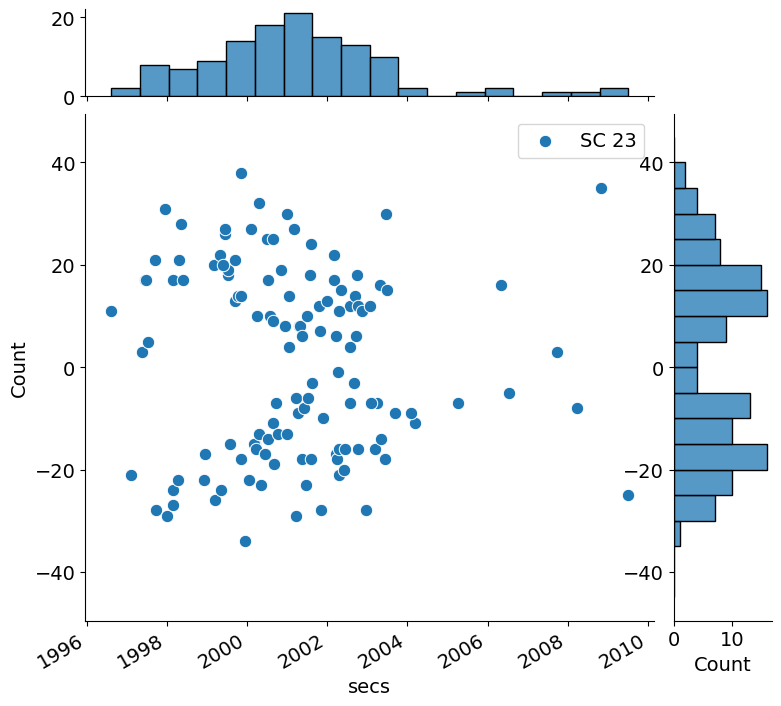

In [22]:
#sns.set_style("white")

plt.rcParams.update({'font.size': 14})
g=sns.jointplot(data=emp,x='secs',y='Count', 
                marginal_ticks=True,marginal_kws={'bins': 18}, 
                kind="scatter", s=80,
               height=8,label='SC 23')
#plt.gcf().autofmt_xdate()

g.ax_joint.set_xticks(labelst)


newlabels=[dt.date.fromtimestamp(h) for h in labelst]

g.ax_joint.set(xticklabels=[h[0:4] for h in labelsd])

plt.gcf().autofmt_xdate()

g.ax_marg_y.clear()
#g.ax_marg_x.clear()

#date_form = mdates.DateFormatter("%y")
#g.ax_joint.xaxis.set_major_formatter(date_form)
plt.setp(g.ax_marg_x.get_yticklabels(), visible=True)
plt.setp(g.ax_marg_y.get_xticklabels(), visible=True)

# Configurar histograma marginal de Y (Count)
#sns.histplot(emp['Count'], bins=15, binrange=(-45, 45), ax=g.ax_marg_y, orientation="horizontal")
#sns.histplot(emp['Count'], ax=g.ax_marg_y, orientation="vertical")
sns.histplot(data=emp, y="Count", ax=g.ax_marg_y, kde=False, bins=18, binrange=(-45, 45))
#sns.histplot(data=emp, x="secs", ax=g.ax_marg_x, kde=False, bins=18)
g.ax_marg_y.set_ylabel('')

sns.scatterplot(data=emp[emp['ARs'].isin(cycle24)],color='tab:green',x='secs',y='Count', s=80,label='SC 24')
sns.scatterplot(data=emp[emp['ARs'].isin(cycle22)],color='violet',x='secs',y='Count', s=80,label='SC 22')
sns.scatterplot(data=emp[emp['ARs'].isin(nonhale)],color='tab:orange',x='secs',y='Count', s=80,label='Non-Hale')

g.ax_marg_y.set_xlabel('ARs')
#g.ax_marg_x.set_ylabel('ARs')
g.ax_marg_x.set_ylabel('ARs', labelpad=10)
g.ax_joint.set_ylabel('ARs')


#g.ax_marg_y.set_yticklabels([])
#g.ax_marg_y.set_yticklabels([])
g.ax_marg_y.tick_params(axis='y', labelleft=False)
g.ax_marg_x.tick_params(axis='x', labelbottom=False)

g.ax_joint.set(xticklabels=[h[0:4] for h in labelsd])

plt.axhline(0,color='black')
plt.ylim(-45,45)
plt.ylabel('Latitude [deg]')
plt.xlabel('Date [year]')

plt.legend()

plt.savefig('./plots/butterfly.png',dpi=300)
plt.savefig('./plots/butterfly.pdf',dpi=300)

#newlabels=[dt.date.fromtimestamp(t1) for t1 in ax.axes[0,0].get_ticks()]

In [64]:
nonhale=[8056,10268]

In [59]:
cycle24=[11024,11007]
cycle22=[7982,8060,8040]

In [45]:
#check for non-hale

hale=[]
nonhale=[]

bitype=[]

for name in ars:
    
    lat=searchar(str(name))[1]
    datad,times=opencube2(name=str(name),path='../movies')
    
    nn=DF0[DF0['AR']==name].range.values[0]
    
    mask_cube=np.load('./masks/'+str(name)+'_mask.npy')[:,:,0:nn]
    data2=datad[:,:,0:nn]*mask_cube
    xp=np.mean([barys(data2[:,:,i],20)[0] for i in range(nn)])
    xn=np.mean([barys(data2[:,:,i],20)[2] for i in range(nn)])
    
    test=emp[emp['ARs']==name]['Count'].values[0]*(xp-xn)
    if test > 0:
        hale.append(name)
        bitype.append('Hale')
    else:
        nonhale.append(name)
        bitype.append('Non-Hale')
        
print(hale,nonhale)
    

    

nt 0.22970201
time b'23-Sep-2002 03:11:01.323'
lat 6
133 123 33
b'21-Sep-2002 22:23:01.298' b'24-Sep-2002 03:11:01.344'
75 84
nt 0.27008736
time b'29-Mar-2003 20:48:00.534'
lat -7
155 193 68
b'27-Mar-2003 14:24:00.501' b'1-Apr-2003 03:12:00.557'
96 159
nt 0.099744365
time b'27-Apr-2003 19:12:00.360'
lat 16
231 171 68
b'25-Apr-2003 16:03:00.390' b'30-Apr-2003 04:47:00.310'
73 119
nt -0.3175573
time b'11-Jun-2003 11:10:59.370'
lat -18
145 137 57
b'9-Jun-2003 22:22:59.390' b'13-Jun-2003 17:34:59.340'
70 88
nt -0.100707754
time b'7-Mar-2004 09:39:03.290'
lat -11
96 119 68
b'4-Mar-2004 19:15:03.230' b'9-Mar-2004 08:03:03.330'
71 103
nt -0.22048052
time b'3-May-2006 14:23:01.490'
lat 16
143 151 65
b'1-May-2006 11:11:01.530' b'5-May-2006 19:11:01.450'
71 96
nt 0.5028164
time b'17-Jul-2006 20:48:01.690'
lat -5
163 191 68
b'15-Jul-2006 17:36:01.630' b'20-Jul-2006 06:23:01.750'
91 141
nt 0.2560891
time b'29-Sep-2007 14:23:02.000'
lat 3
151 169 56
b'28-Sep-2007 00:03:02.040' b'1-Oct-2007 17:36:01

In [49]:
emp=emp.assign(Tipo=bitype)

In [43]:
nonhale

[11024, 11007, 7982, 8040, 10268, 8056, 8060]

In [37]:
1*emp[emp['ARs']==10268]['Count'].v

AttributeError: 'Series' object has no attribute 'sign'

In [70]:
newlabels

[datetime.date(1996, 12, 7),
 datetime.date(2000, 2, 8),
 datetime.date(2003, 4, 10),
 datetime.date(2006, 6, 11),
 datetime.date(2009, 8, 11)]

In [72]:
#ax.get_xticklabels()
ax.ax_joint.set(xticklabels=newlabels)

/tmp/ipykernel_6872/3522281964.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.ax_joint.set(xticklabels=newlabels)


[[Text(800000000.0, 0, '1996-12-07'),
  Text(850000000.0, 0, '2000-02-08'),
  Text(900000000.0, 0, '2003-04-10'),
  Text(950000000.0, 0, '2006-06-11'),
  Text(1000000000.0, 0, '2009-08-11'),
  Text(1050000000.0, 0, ''),
  Text(1100000000.0, 0, ''),
  Text(1150000000.0, 0, ''),
  Text(1200000000.0, 0, ''),
  Text(1250000000.0, 0, ''),
  Text(1300000000.0, 0, '')]]

In [116]:
ars

array([10132, 10323, 10344, 10381, 10569, 10879, 10900, 10971, 11024,
        8088,  8122,  8130,  8164,  8167,  8171,  8214,  8226,  8476,
        8582,  8614,  8628, 10043, 10045, 10050, 10099, 10103, 10130,
       10137, 10144, 10188, 10226, 10311, 10349, 10385, 10391, 10456,
       10547, 10747, 10987, 11007,  7982,  8016,  8040,  8052,  8084,
        8193,  8205,  8404,  8407,  8488,  8524,  8536,  8552,  8589,
        8649,  8690,  8699, 10268, 10274,  8056,  8060,  8722,  8749,
        8757,  8760,  8797,  8828,  8851,  8898,  8900,  8913,  8924,
        8968,  8972,  8986,  9032,  9035,  9063,  9069,  9070,  9103,
        9139,  9140,  9144,  9154,  9170,  9192,  9218,  9267,  9290,
        9291,  9308,  9311,  9368,  9396,  9399,  9417,  9432,  9441,
        9455,  9456,  9484,  9511,  9512,  9531,  9548,  9563,  9569,
        9574,  9660,  9678,  9689,  9710,  9764,  9844,  9845,  9873,
        9880,  9884,  9897,  9906,  9910,  9912,  9931,  9978,  9987])

# Make CSV with list of ARs

In [18]:
DF0=pd.read_csv('./arangosx.csv',index_col=0)

In [19]:
DF0

,AR,range,sigma
0,10132,33,264.259959
1,10323,68,238.178270
2,10344,35,310.926576
3,10381,47,189.225573
4,10569,38,145.857329
...,...,...,...
121,9910,29,220.980023
122,9912,68,285.187603
123,9931,50,210.500545
124,9978,37,296.205793


In [61]:
pixsize=1.98*725*1000*100
pixarea=pixsize*pixsize
DFs=[]

#for name in [8088]:
for name in ars:
    

    print(str(name)+'----------------------------------')
    lat=searchar(str(name))[1]
    try:
        try:
            DF1=pd.read_csv('./posteriors3/'+str(name)+'_TM3.csv')
        except Exception as e:
            print(f'{name} not found in posterior 3')
            DF1=pd.read_csv('./posteriors2/'+str(name)+'_TM3.csv')
        nn=int(DF1.mag.max())   
        datad = np.transpose(np.load(f'../newdat/{name}_cube_data.npy'),axes=(1,2,0))[:,:,0:nn+1]
        mask_cube= np.load(f'./masks2/mask_{name}.npy')[:,:,0:nn+1]
        stp=round(nn/len(set(DF1.mag)))
        thr=0
    except Exception as e:
        try:
            DF1=pd.read_csv('./posteriors3/'+str(name)+'_TM3.csv')
        except Exception as e:
            print(f"Error processing {name}: {str(e)}")
            DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')
        nn=DF0[DF0['AR']==name].range.values[0]         
        datad,times=opencube2(name=str(name),path='../movies')
        datad=datad[:,:,0:nn]
        mask_cube=np.load('./masks/'+str(name)+'_mask.npy')[:,:,0:nn]
        stp=round(nn/DF1.mag.max())
        DF1=DF1.assign(mag=lambda x: x.mag*stp)
        thr=20
        #continue
        


    

    scl=1
  
    
 #   nn=DF0[DF0['AR']==name].range.values[0]
 #   sg0=DF0[DF0['AR']==name].sigma.values[0]
    
    
    data2=datad*mask_cube
    sz2,sz1,nMagnetograms = (np.shape(data2))
    
    print(sz2,sz1,nMagnetograms)
    

    
    
   # thr=10
    
    flux=np.sum(np.abs(data2)*(np.abs(data2)>thr)/2,axis=(0,1))
    fluxp=np.sum(np.abs(data2*(data2>thr)),axis=(0,1))
    fluxn=np.sum(np.abs(data2*(data2<-thr)),axis=(0,1))
    fln=flux/np.max(flux)
    
    tl=[tilt(data2[:,:,i],thr)[0]*180/np.pi for i in range(nMagnetograms)]
    sar=[sizes(data2[:,:,i],thr)[2] for i in range(nMagnetograms)]
    xp=[barys(data2[:,:,i],thr)[0] for i in range(nMagnetograms)]
    xn=[barys(data2[:,:,i],thr)[2] for i in range(nMagnetograms)]
    yp=[barys(data2[:,:,i],thr)[1] for i in range(nMagnetograms)]
    yn=[barys(data2[:,:,i],thr)[3] for i in range(nMagnetograms)]
    xcen=[barys(np.abs(data2[:,:,i]),thr)[0] for i in range(nMagnetograms)]
    ycen=[barys(np.abs(data2[:,:,i]),thr)[1] for i in range(nMagnetograms)]
    lead=1
    if np.mean(xp) < np.mean(xn):
        lead=-1


 
  #  magmax=DF1.mag.max()
  #  stp=round(len(flux)/magmax)
  #  DF1=DF1.assign(mag=lambda x: x.mag*stp)

    DFs.append(DF1.groupby('mag').mean().assign(alphab=tl[::stp],
                                              #  Dalpha=lambda x: 180*(x.alpha-x.alpha[int(stp*magmax)])/np.pi,
                                              #  Dalphab=tl[::stp]-tl[-1],
                                                sar=sar[::stp],
                                             #   ratSp=msp[::stp]/sar[::stp],
                                              #  ratSn=msn[::stp]/sar[::stp],
                                                lead=lead,
                                                flux=flux[::stp],fluxp=fluxp[::stp],fluxn=fluxn[::stp],
                                                fint=fln[::stp],lat=lat,AR=name,spt=stp))

    
DF = pd.concat(DFs)


DF=DF.assign(flux=lambda x: x.flux*pixarea)
DF=DF.assign(fluxp=lambda x: x.fluxp*pixarea)
DF=DF.assign(fluxn=lambda x: x.fluxn*pixarea)

DF=DF.assign(axf=lambda x: x.axf*pixarea)
    


10132----------------------------------
nt 0.22970201
time b'23-Sep-2002 03:11:01.323'
lat 6
10132 not found in posterior 3
Error processing 10132: [Errno 2] No such file or directory: './posteriors3/10132_TM3.csv'
133 123 33
b'21-Sep-2002 22:23:01.298' b'24-Sep-2002 03:11:01.344'
75 84
75 84 33
10323----------------------------------
nt 0.27008736
time b'29-Mar-2003 20:48:00.534'
lat -7
10323 not found in posterior 3
Error processing 10323: [Errno 2] No such file or directory: './posteriors3/10323_TM3.csv'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


155 193 68
b'27-Mar-2003 14:24:00.501' b'1-Apr-2003 03:12:00.557'
96 159
96 159 68


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10344----------------------------------
nt 0.099744365
time b'27-Apr-2003 19:12:00.360'
lat 16
50 90 81


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10381----------------------------------
nt -0.3175573
time b'11-Jun-2003 11:10:59.370'
lat -18
10381 not found in posterior 3
Error processing 10381: [Errno 2] No such file or directory: './posteriors3/10381_TM3.csv'
145 137 57
b'9-Jun-2003 22:22:59.390' b'13-Jun-2003 17:34:59.340'
70 88
70 88 47
10569----------------------------------


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


nt -0.100707754
time b'7-Mar-2004 09:39:03.290'
lat -11
96 119 68
b'4-Mar-2004 19:15:03.230' b'9-Mar-2004 08:03:03.330'
71 103
71 103 38
10879----------------------------------
nt -0.22048052
time b'3-May-2006 14:23:01.490'
lat 16
10879 not found in posterior 3
Error processing 10879: [Errno 2] No such file or directory: './posteriors3/10879_TM3.csv'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


143 151 65
b'1-May-2006 11:11:01.530' b'5-May-2006 19:11:01.450'
71 96
71 96 46
10900----------------------------------
nt 0.5028164
time b'17-Jul-2006 20:48:01.690'
lat -5
10900 not found in posterior 3
Error processing 10900: [Errno 2] No such file or directory: './posteriors3/10900_TM3.csv'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


163 191 68
b'15-Jul-2006 17:36:01.630' b'20-Jul-2006 06:23:01.750'
91 141
91 141 58


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10971----------------------------------
nt 0.2560891
time b'29-Sep-2007 14:23:02.000'
lat 3
10971 not found in posterior 3
46 79 59


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


11024----------------------------------
nt -0.20700613
time b'5-Jul-2009 00:00:02.110'
lat -25
11024 not found in posterior 3
Error processing 11024: [Errno 2] No such file or directory: './posteriors3/11024_TM3.csv'
137 157 48
b'4-Jul-2009 00:00:02.090' b'7-Jul-2009 04:48:02.170'
103 125
103 125 44


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8088----------------------------------
nt 0.8990149
time b'25-Sep-1997 17:39:03.330'
lat -28
57 160 75


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8122----------------------------------
nt 0.39810258
time b'11-Dec-1997 11:15:04.383'
lat 31
8122 not found in posterior 3
Error processing 8122: [Errno 2] No such file or directory: './posteriors3/8122_TM3.csv'
167 171 39
b'11-Dec-1997 00:03:04.391' b'13-Dec-1997 20:48:04.341'
84 109
84 109 33


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8130----------------------------------
nt 0.18575855
time b'1-Jan-1998 04:51:03.930'
lat -29
47 70 61
8164----------------------------------
nt -0.8802456
time b'25-Feb-1998 00:00:03.150'
lat 17
8164 not found in posterior 3
Error processing 8164: [Errno 2] No such file or directory: './posteriors3/8164_TM3.csv'
143 129 57
b'23-Feb-1998 11:12:03.150' b'27-Feb-1998 06:24:03.160'
77 101
77 101 52


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8167----------------------------------
nt 0.20348336
time b'26-Feb-1998 06:24:03.160'
lat -27
8167 not found in posterior 3
Error processing 8167: [Errno 2] No such file or directory: './posteriors3/8167_TM3.csv'
165 159 45
b'24-Feb-1998 11:12:03.150' b'27-Feb-1998 14:24:03.160'
69 79
69 79 34
8171----------------------------------
nt 0.38754737
time b'28-Feb-1998 09:36:03.160'
lat -24
8171 not found in posterior 3
Error processing 8171: [Errno 2] No such file or directory: './posteriors3/8171_TM3.csv'
125 147 39
b'27-Feb-1998 20:48:03.160' b'2-Mar-1998 11:12:03.160'
73 128
73 128 39
8214----------------------------------
nt 0.32787043
time b'4-May-1998 06:24:04.386'
lat 28
8214 not found in posterior 3
Error processing 8214: [Errno 2] No such file or directory: './posteriors3/8214_TM3.csv'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


167 235 63
b'2-May-1998 08:00:04.349' b'6-May-1998 12:47:44.000'
103 209
103 209 63


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8226----------------------------------
nt -0.43080446
time b'23-May-1998 04:47:04.637'
lat 17
135 165 34
b'22-May-1998 22:23:04.636' b'25-May-1998 04:51:04.642'
79 111
79 111 34
8476----------------------------------
nt -0.4316836
time b'2-Mar-1999 22:25:02.172'
lat 20
8476 not found in posterior 3
Error processing 8476: [Errno 2] No such file or directory: './posteriors3/8476_TM3.csv'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


155 187 48
b'1-Mar-1999 01:35:02.160' b'4-Mar-1999 06:27:02.183'
102 160
102 160 48


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8582----------------------------------
nt -0.43070436
time b'14-Jun-1999 12:48:03.198'
lat 26
8582 not found in posterior 3
Error processing 8582: [Errno 2] No such file or directory: './posteriors3/8582_TM3.csv'
149 173 68
b'12-Jun-1999 04:48:03.255' b'16-Jun-1999 17:36:03.139'
64 114
64 114 62


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8614----------------------------------
nt 0.007328119
time b'7-Jul-1999 03:15:02.618'
lat 18
8614 not found in posterior 3
100 150 53


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8628----------------------------------
nt -0.48652005
time b'13-Jul-1999 07:59:02.509'
lat 19
75 125 77


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10043----------------------------------
nt -0.17969224
time b'27-Jul-2002 20:47:00.271'
lat 12
10043 not found in posterior 3
83 141 89


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10045----------------------------------
nt 0.20720176
time b'25-Jul-2002 23:59:00.262'
lat 4
10045 not found in posterior 3
Error processing 10045: [Errno 2] No such file or directory: './posteriors3/10045_TM3.csv'
111 137 60
b'24-Jul-2002 09:35:00.257' b'28-Jul-2002 09:35:00.274'
84 96
84 96 48


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10050----------------------------------
nt -0.33323297
time b'29-Jul-2002 12:47:00.281'
lat -7
10050 not found in posterior 3
Error processing 10050: [Errno 2] No such file or directory: './posteriors3/10050_TM3.csv'
147 151 68
b'27-Jul-2002 04:47:00.267' b'31-Jul-2002 17:35:00.299'
78 142
78 142 68


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10099----------------------------------
nt 0.4382631
time b'3-Sep-2002 16:03:00.877'
lat -3
10099 not found in posterior 3
Error processing 10099: [Errno 2] No such file or directory: './posteriors3/10099_TM3.csv'
127 155 54
b'1-Sep-2002 14:23:00.819' b'5-Sep-2002 06:24:00.921'
79 119
79 119 36
10103----------------------------------
nt 0.23280734
time b'9-Sep-2002 09:35:01.026'
lat 14
10103 not found in posterior 3


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


100 120 81


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10130----------------------------------
nt -0.32461786
time b'26-Sep-2002 19:12:01.398'
lat 18
75 132 77


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10137----------------------------------
nt -0.58317417
time b'3-Oct-2002 09:35:01.511'
lat -16
10137 not found in posterior 3
80 100 89


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10144----------------------------------
nt 0.13304873
time b'11-Oct-2002 08:03:01.556'
lat 12
10144 not found in posterior 3
60 100 67


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10188----------------------------------
nt -0.111358725
time b'8-Nov-2002 12:47:01.165'
lat 11
10188 not found in posterior 3
62 80 39
10226----------------------------------
nt 0.45246956
time b'18-Dec-2002 01:39:00.199'
lat -28
100 170 81


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10311----------------------------------
nt -0.084757
time b'13-Mar-2003 06:27:00.200'
lat -16
66 121 63


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10349----------------------------------
nt -0.13522457
time b'1-May-2003 08:03:00.290'
lat -14
10349 not found in posterior 3
90 120 93


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10385----------------------------------
nt 0.26007137
time b'18-Jun-2003 06:26:59.310'
lat 30
50 80 73


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10391----------------------------------
nt -0.342548
time b'24-Jun-2003 03:10:59.293'
lat 15
175 229 52
b'22-Jun-2003 23:59:59.294' b'26-Jun-2003 12:48:28.000'
54 103
54 103 52


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10456----------------------------------
nt 0.25810575
time b'9-Sep-2003 16:03:03.251'
lat -9
10456 not found in posterior 3
Error processing 10456: [Errno 2] No such file or directory: './posteriors3/10456_TM3.csv'
147 181 56
b'7-Sep-2003 23:59:03.215' b'11-Sep-2003 19:12:03.298'
64 103
64 103 56


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10547----------------------------------
nt -0.4519321
time b'1-Feb-2004 04:47:02.370'
lat -9
117 125 67
b'29-Jan-2004 14:23:02.328' b'3-Feb-2004 03:11:02.406'
76 114
76 114 56


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10747----------------------------------
nt -0.10116805
time b'2-Apr-2005 15:59:03.420'
lat -7
135 129 60
b'31-Mar-2005 17:35:03.440' b'4-Apr-2005 17:39:03.390'
88 115
88 115 60


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10987----------------------------------
nt 0.051508203
time b'27-Mar-2008 09:35:01.850'
lat -8
10987 not found in posterior 3
70 148 75


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


11007----------------------------------
nt -0.3601465
time b'1-Nov-2008 06:27:01.190'
lat 35
89 171 60
b'30-Oct-2008 14:27:01.200' b'3-Nov-2008 14:24:01.170'
49 120
49 120 54


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


7982----------------------------------
nt -0.15810041
time b'9-Aug-1996 12:48:04.510'
lat 11
7982 not found in posterior 3
Error processing 7982: [Errno 2] No such file or directory: './posteriors3/7982_TM3.csv'
185 253 50
b'7-Aug-1996 17:36:04.540' b'11-Aug-1996 16:00:04.470'
92 110
92 110 50


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8016----------------------------------
nt 0.754662
time b'4-Feb-1997 17:36:04.320'
lat -21
46 102 45


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8040----------------------------------
nt -0.57436186
time b'20-May-1997 22:28:05.517'
lat 3
8040 not found in posterior 3
65 170 85


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8052----------------------------------
nt 0.23809247
time b'16-Jun-1997 01:36:05.530'
lat 17
8052 not found in posterior 3
48 80 77


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8084----------------------------------
nt -0.3017031
time b'10-Sep-1997 19:11:03.230'
lat 21
8084 not found in posterior 3
108 187 81


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8193----------------------------------
nt 0.21090922
time b'8-Apr-1998 03:12:03.680'
lat -22
8193 not found in posterior 3
65 105 81


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8205----------------------------------
nt 0.018779555
time b'17-Apr-1998 22:27:03.960'
lat 21
8205 not found in posterior 3
Error processing 8205: [Errno 2] No such file or directory: './posteriors3/8205_TM3.csv'
173 225 50
b'17-Apr-1998 01:36:03.930' b'20-Apr-1998 09:39:04.040'
57 112
57 112 50


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8404----------------------------------
nt -0.5628848
time b'7-Dec-1998 03:12:04.309'
lat -22
8404 not found in posterior 3
Error processing 8404: [Errno 2] No such file or directory: './posteriors3/8404_TM3.csv'
181 175 51
b'5-Dec-1998 20:48:04.330' b'9-Dec-1998 08:03:04.265'
103 113
103 113 51


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8407----------------------------------
nt -0.49183846
time b'9-Dec-1998 08:03:04.265'
lat -17
8407 not found in posterior 3
46 104 47


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8488----------------------------------
nt 0.33024722
time b'17-Mar-1999 17:36:02.395'
lat -26
8488 not found in posterior 3
82 133 75


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8524----------------------------------
nt 0.5043078
time b'28-Apr-1999 20:48:03.429'
lat 22
40 120 85


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8536----------------------------------
nt 0.31584212
time b'10-May-1999 22:24:03.609'
lat -24
8536 not found in posterior 3
70 80 71


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8552----------------------------------
nt -0.1878991
time b'29-May-1999 09:36:03.504'
lat 20
75 100 67


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8589----------------------------------
nt -0.0740425
time b'17-Jun-1999 03:15:03.128'
lat 27
8589 not found in posterior 3
Error processing 8589: [Errno 2] No such file or directory: './posteriors3/8589_TM3.csv'
139 169 50
b'16-Jun-1999 00:00:03.159' b'19-Jun-1999 07:59:03.064'
65 84
65 84 50


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8649----------------------------------
nt 1.3202796
time b'28-Jul-1999 20:48:02.290'
lat -15
8649 not found in posterior 3
Error processing 8649: [Errno 2] No such file or directory: './posteriors3/8649_TM3.csv'
141 133 59
b'27-Jul-1999 01:39:02.304' b'31-Jul-1999 00:00:02.278'
62 119
62 119 58


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8690----------------------------------
nt -0.27577832
time b'12-Sep-1999 08:03:02.412'
lat 13
8690 not found in posterior 3
89 100 109


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8699----------------------------------
nt 0.40937185
time b'14-Sep-1999 01:36:02.434'
lat 21
8699 not found in posterior 3
Error processing 8699: [Errno 2] No such file or directory: './posteriors3/8699_TM3.csv'
177 213 71
b'11-Sep-1999 17:35:02.404' b'16-Sep-1999 11:11:02.467'
78 107
78 107 47


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10268----------------------------------
nt -0.85674816
time b'23-Jan-2003 17:38:59.150'
lat 12
10268 not found in posterior 3
Error processing 10268: [Errno 2] No such file or directory: './posteriors3/10268_TM3.csv'
163 165 65
b'21-Jan-2003 14:23:59.130' b'25-Jan-2003 22:23:59.170'
67 64
67 64 63


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10274----------------------------------
nt 0.60579824
time b'3-Feb-2003 06:23:59.280'
lat -7
10274 not found in posterior 3
Error processing 10274: [Errno 2] No such file or directory: './posteriors3/10274_TM3.csv'
159 159 54
b'1-Feb-2003 19:11:59.260' b'5-Feb-2003 14:26:59.310'
44 94
44 94 28
8056----------------------------------
nt -0.29089484
time b'24-Jun-1997 16:00:05.380'
lat 17
8056 not found in posterior 3
Error processing 8056: [Errno 2] No such file or directory: './posteriors3/8056_TM3.csv'
123 133 32
b'24-Jun-1997 16:00:05.380' b'26-Jun-1997 19:12:05.340'
67 97
67 97 32
8060----------------------------------
nt 0.20399585
time b'9-Jul-1997 09:36:04.030'
lat 5
8060 not found in posterior 3
Error processing 8060: [Errno 2] No such file or directory: './posteriors3/8060_TM3.csv'
119 147 46
b'7-Jul-1997 14:24:04.080' b'10-Jul-1997 17:36:03.990'
66 80
66 80 39


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8722----------------------------------
nt -0.31395748
time b'6-Oct-1999 11:12:02.932'
lat 14
8722 not found in posterior 3
Error processing 8722: [Errno 2] No such file or directory: './posteriors3/8722_TM3.csv'
137 167 59
b'4-Oct-1999 17:35:02.882' b'8-Oct-1999 16:00:02.992'
76 112
76 112 42


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8749----------------------------------
nt 0.49803734
time b'2-Nov-1999 09:35:03.479'
lat -18
60 120 85


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8757----------------------------------
nt 0.25054723
time b'6-Nov-1999 15:59:03.520'
lat 38
8757 not found in posterior 3
Error processing 8757: [Errno 2] No such file or directory: './posteriors3/8757_TM3.csv'
121 139 47
b'5-Nov-1999 20:47:03.514' b'9-Nov-1999 00:03:03.529'
64 110
64 110 36


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8760----------------------------------
nt -0.36111027
time b'10-Nov-1999 14:24:03.529'
lat 14
8760 not found in posterior 3
Error processing 8760: [Errno 2] No such file or directory: './posteriors3/8760_TM3.csv'
181 203 68
b'8-Nov-1999 08:03:03.527' b'12-Nov-1999 20:47:03.522'
103 157
103 157 58


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8797----------------------------------
nt 0.2130621
time b'14-Dec-1999 23:59:02.913'
lat -34
8797 not found in posterior 3
Error processing 8797: [Errno 2] No such file or directory: './posteriors3/8797_TM3.csv'
159 165 61
b'12-Dec-1999 23:59:02.976' b'17-Dec-1999 01:35:02.848'
79 131
79 131 53


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8828----------------------------------
nt -0.24449492
time b'16-Jan-2000 12:47:02.194'
lat -22
100 100 61


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8851----------------------------------
nt -0.51298064
time b'3-Feb-2000 04:47:02.134'
lat 27
45 90 81


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8898----------------------------------
nt -0.24635516
time b'8-Mar-2000 16:03:02.402'
lat -15
8898 not found in posterior 3
87 130 85


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8900----------------------------------
nt 0.59878176
time b'6-Mar-2000 04:51:02.359'
lat -15
8900 not found in posterior 3
Error processing 8900: [Errno 2] No such file or directory: './posteriors3/8900_TM3.csv'
199 193 62
b'4-Mar-2000 03:11:02.323' b'8-Mar-2000 06:23:02.395'
108 157
108 157 59


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8913----------------------------------
nt 0.59115076
time b'20-Mar-2000 09:39:02.650'
lat -16
102 200 53


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8924----------------------------------
nt -0.50496656
time b'28-Mar-2000 20:47:02.906'
lat 10
65 110 73


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8968----------------------------------
nt -0.39869824
time b'21-Apr-2000 23:59:03.481'
lat -13
8968 not found in posterior 3
55 103 59


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8972----------------------------------
nt 0.31233174
time b'22-Apr-2000 03:15:03.484'
lat 32
8972 not found in posterior 3
Error processing 8972: [Errno 2] No such file or directory: './posteriors3/8972_TM3.csv'
145 155 44
b'21-Apr-2000 16:03:03.476' b'24-Apr-2000 14:27:03.525'
64 102
64 102 44


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8986----------------------------------
nt 0.22236077
time b'10-May-2000 15:59:03.595'
lat -23
8986 not found in posterior 3
Error processing 8986: [Errno 2] No such file or directory: './posteriors3/8986_TM3.csv'
153 147 52
b'9-May-2000 04:48:03.607' b'12-May-2000 16:03:03.575'
87 102
87 102 48


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9032----------------------------------
nt -0.29759607
time b'9-Jun-2000 00:00:03.051'
lat -17
65 110 57


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9035----------------------------------
nt 0.13140693
time b'10-Jun-2000 04:48:03.016'
lat -17
9035 not found in posterior 3
47 114 53


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9063----------------------------------
nt 0.38586
time b'30-Jun-2000 06:24:02.555'
lat 25
9063 not found in posterior 3
75 151 89


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9069----------------------------------
nt 0.29835546
time b'8-Jul-2000 06:24:01.412'
lat -14
9069 not found in posterior 3
Error processing 9069: [Errno 2] No such file or directory: './posteriors3/9069_TM3.csv'
165 171 39
b'7-Jul-2000 16:00:01.422' b'10-Jul-2000 08:00:01.379'
69 116
69 116 39


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9070----------------------------------
nt -0.43671554
time b'7-Jul-2000 22:24:01.418'
lat 17
9070 not found in posterior 3
100 140 63


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9103----------------------------------
nt -0.1568508
time b'29-Jul-2000 06:27:01.277'
lat 10
9103 not found in posterior 3
Error processing 9103: [Errno 2] No such file or directory: './posteriors3/9103_TM3.csv'
177 171 65
b'27-Jul-2000 00:00:01.277' b'31-Jul-2000 07:59:01.274'
82 92
82 92 58


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9139----------------------------------
nt 0.0006354236
time b'22-Aug-2000 17:35:01.302'
lat -11
53 135 75
9140----------------------------------
nt 0.35788396
time b'27-Aug-2000 22:23:01.361'
lat 9
9140 not found in posterior 3


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


60 100 93


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9144----------------------------------
nt -0.1262798
time b'26-Aug-2000 23:59:01.350'
lat 25
9144 not found in posterior 3
Error processing 9144: [Errno 2] No such file or directory: './posteriors3/9144_TM3.csv'
153 179 59
b'25-Aug-2000 11:11:01.332' b'29-Aug-2000 09:39:01.378'
83 94
83 94 55


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9154----------------------------------
nt 0.21506613
time b'5-Sep-2000 11:15:01.465'
lat -19
9154 not found in posterior 3
Error processing 9154: [Errno 2] No such file or directory: './posteriors3/9154_TM3.csv'
157 185 57
b'3-Sep-2000 22:24:01.445' b'7-Sep-2000 17:39:01.498'
110 130
110 130 39


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9170----------------------------------
nt 0.1493193
time b'24-Sep-2000 00:00:01.886'
lat -7
9170 not found in posterior 3
Error processing 9170: [Errno 2] No such file or directory: './posteriors3/9170_TM3.csv'
145 159 67
b'21-Sep-2000 14:23:01.817' b'26-Sep-2000 03:11:01.945'
76 124
76 124 67


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9192----------------------------------
nt -0.36078313
time b'12-Oct-2000 03:12:02.302'
lat -13
9192 not found in posterior 3
Error processing 9192: [Errno 2] No such file or directory: './posteriors3/9192_TM3.csv'
163 229 47
b'11-Oct-2000 04:51:02.283' b'14-Oct-2000 08:03:02.344'
63 79
63 79 34
9218----------------------------------
nt -0.19383158
time b'4-Nov-2000 20:48:02.513'
lat 19
9218 not found in posterior 3
91 130 67


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9267----------------------------------
nt 0.4771718
time b'14-Dec-2000 17:36:01.630'
lat 8
80 100 61


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9290----------------------------------
nt 0.11672378
time b'30-Dec-2000 06:27:01.305'
lat 30
9290 not found in posterior 3
65 131 75


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9291----------------------------------
nt 0.16271383
time b'1-Jan-2001 19:12:01.259'
lat -13
9291 not found in posterior 3
Error processing 9291: [Errno 2] No such file or directory: './posteriors3/9291_TM3.csv'
235 207 61
b'30-Dec-2000 06:27:01.305' b'3-Jan-2001 08:03:01.233'
57 133
57 133 54


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9308----------------------------------
nt 0.35572606
time b'14-Jan-2001 20:47:01.130'
lat 14
76 138 61


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9311----------------------------------
nt -0.36246952
time b'19-Jan-2001 16:03:01.129'
lat 4
56 125 57


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9368----------------------------------
nt -0.048162982
time b'6-Mar-2001 11:11:01.522'
lat 27
9368 not found in posterior 3
80 150 89


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9396----------------------------------
nt 0.15371399
time b'24-Mar-2001 14:24:02.050'
lat -6
9396 not found in posterior 3
Error processing 9396: [Errno 2] No such file or directory: './posteriors3/9396_TM3.csv'
133 149 40
b'24-Mar-2001 04:48:02.038' b'26-Mar-2001 20:48:02.112'
82 103
82 103 40


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9399----------------------------------
nt -0.63663596
time b'25-Mar-2001 08:00:02.071'
lat -29
9399 not found in posterior 3
Error processing 9399: [Errno 2] No such file or directory: './posteriors3/9399_TM3.csv'
135 131 48
b'24-Mar-2001 08:00:02.042' b'27-Mar-2001 12:48:02.130'
60 98
60 98 42


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9417----------------------------------
nt 0.55496114
time b'8-Apr-2001 00:00:02.382'
lat -9
70 125 75


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9432----------------------------------
nt 0.34031108
time b'20-Apr-2001 08:00:02.585'
lat 8
9432 not found in posterior 3
Error processing 9432: [Errno 2] No such file or directory: './posteriors3/9432_TM3.csv'
165 141 68
b'18-Apr-2001 04:48:02.561' b'22-Apr-2001 17:36:02.602'
95 105
95 105 63


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9441----------------------------------
nt 0.32465053
time b'30-Apr-2001 17:36:02.585'
lat 8
9441 not found in posterior 3
100 130 73


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9455----------------------------------
nt 0.31837264
time b'13-May-2001 06:24:02.432'
lat -18
173 199 67
b'10-May-2001 19:12:02.467' b'15-May-2001 08:00:02.399'
73 178
73 178 60


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9456----------------------------------
nt 0.33141598
time b'12-May-2001 19:12:02.438'
lat 6
9456 not found in posterior 3
Error processing 9456: [Errno 2] No such file or directory: './posteriors3/9456_TM3.csv'
117 143 48
b'11-May-2001 12:48:02.457' b'14-May-2001 19:12:02.408'
67 126
67 126 44


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9484----------------------------------
nt -0.27230248
time b'4-Jun-2001 17:35:01.890'
lat -8
9484 not found in posterior 3
Error processing 9484: [Errno 2] No such file or directory: './posteriors3/9484_TM3.csv'
195 209 68
b'2-Jun-2001 04:51:01.960' b'6-Jun-2001 17:35:01.838'
91 165
91 165 68


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9511----------------------------------
nt 0.61098146
time b'25-Jun-2001 07:59:01.465'
lat 10
50 100 55


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9512----------------------------------
nt -0.45239586
time b'24-Jun-2001 06:23:01.485'
lat -23
9512 not found in posterior 3
70 125 85


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9531----------------------------------
nt -0.28701404
time b'10-Jul-2001 11:11:01.287'
lat -6
9531 not found in posterior 3
Error processing 9531: [Errno 2] No such file or directory: './posteriors3/9531_TM3.csv'
131 127 67
b'8-Jul-2001 04:48:01.297' b'12-Jul-2001 17:39:01.284'
68 97
68 97 45


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9548----------------------------------
nt 0.05609981
time b'22-Jul-2001 20:47:02.274'
lat 18
50 100 75


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9563----------------------------------
nt -0.626167
time b'5-Aug-2001 09:35:01.257'
lat 24
9563 not found in posterior 3
92 110 105


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9569----------------------------------
nt -0.21870056
time b'6-Aug-2001 19:11:01.263'
lat -18
9569 not found in posterior 3
Error processing 9569: [Errno 2] No such file or directory: './posteriors3/9569_TM3.csv'
149 143 49
b'5-Aug-2001 15:59:01.258' b'8-Aug-2001 22:23:01.276'
55 92
55 92 49


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9574----------------------------------
nt 0.4575974
time b'11-Aug-2001 06:23:01.295'
lat -3
135 153 49
b'10-Aug-2001 03:15:01.285' b'13-Aug-2001 09:35:01.316'
53 112
53 112 49


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9660----------------------------------
nt 0.34266818
time b'12-Oct-2001 09:35:02.490'
lat 12
57 106 81


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9678----------------------------------
nt -0.6585306
time b'27-Oct-2001 11:11:02.511'
lat 7
9678 not found in posterior 3
80 120 81


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9689----------------------------------
nt -0.22049269
time b'6-Nov-2001 03:12:02.396'
lat -28
9689 not found in posterior 3
Error processing 9689: [Errno 2] No such file or directory: './posteriors3/9689_TM3.csv'
139 127 58
b'4-Nov-2001 08:03:02.421' b'8-Nov-2001 08:03:02.363'
65 80
65 80 34
9710----------------------------------
nt -0.12656155
time b'22-Nov-2001 07:59:02.022'
lat -10


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


60 120 73


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9764----------------------------------
nt -0.18527018
time b'30-Dec-2001 06:27:01.164'
lat 13
9764 not found in posterior 3
Error processing 9764: [Errno 2] No such file or directory: './posteriors3/9764_TM3.csv'
135 151 65
b'27-Dec-2001 23:59:01.189' b'1-Jan-2002 08:03:00.148'
76 107
76 107 65


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9844----------------------------------
nt -0.43503293
time b'26-Feb-2002 09:36:00.537'
lat 22
9844 not found in posterior 3
Error processing 9844: [Errno 2] No such file or directory: './posteriors3/9844_TM3.csv'
153 213 68
b'24-Feb-2002 01:36:00.483' b'28-Feb-2002 14:24:00.593'
80 143
80 143 65


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9845----------------------------------
nt 0.1654642
time b'1-Mar-2002 17:36:00.625'
lat 17
9845 not found in posterior 3
80 120 89


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9873----------------------------------
nt -0.34983066
time b'16-Mar-2002 20:51:01.080'
lat -17
9873 not found in posterior 3
85 120 63
9880----------------------------------
nt -0.20579773
time b'24-Mar-2002 09:36:01.258'
lat 6
9880 not found in posterior 3
Error processing 9880: [Errno 2] No such file or directory: './posteriors3/9880_TM3.csv'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


143 157 51
b'23-Mar-2002 00:00:01.228' b'26-Mar-2002 09:36:01.301'
77 107
77 107 51
9884----------------------------------
nt 0.30859372
time b'30-Mar-2002 20:48:01.395'
lat -18
9884 not found in posterior 3


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


55 80 89
9897----------------------------------
nt 0.14890468
time b'6-Apr-2002 16:00:01.522'
lat -1
9897 not found in posterior 3
Error processing 9897: [Errno 2] No such file or directory: './posteriors3/9897_TM3.csv'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


145 163 39
b'6-Apr-2002 03:12:01.514' b'8-Apr-2002 20:48:01.552'
66 90
66 90 29
9906----------------------------------
nt 0.70626014
time b'14-Apr-2002 19:15:01.593'
lat -16
9906 not found in posterior 3
80 120 93


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9910----------------------------------
nt 0.67646265
time b'18-Apr-2002 14:24:01.587'
lat -21
9910 not found in posterior 3
63 115 77


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9912----------------------------------
nt 0.36655635
time b'21-Apr-2002 01:36:01.571'
lat 11
9912 not found in posterior 3
Error processing 9912: [Errno 2] No such file or directory: './posteriors3/9912_TM3.csv'
141 135 68
b'18-Apr-2002 17:36:01.586' b'23-Apr-2002 06:24:01.551'
97 114
97 114 68


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9931----------------------------------
nt -0.24460411
time b'3-May-2002 07:59:01.430'
lat 15
9931 not found in posterior 3
Error processing 9931: [Errno 2] No such file or directory: './posteriors3/9931_TM3.csv'
147 165 64
b'1-May-2002 01:35:01.461' b'5-May-2002 09:35:01.399'
60 117
60 117 50


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9978----------------------------------
nt -0.27912098
time b'5-Jun-2002 12:47:00.652'
lat -20
9978 not found in posterior 3
60 95 73
9987----------------------------------
nt 0.44796476
time b'8-Jun-2002 20:47:00.589'
lat -16
9987 not found in posterior 3
Error processing 9987: [Errno 2] No such file or directory: './posteriors3/9987_TM3.csv'


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


191 189 64
b'6-Jun-2002 17:35:00.629' b'11-Jun-2002 00:00:00.549'
65 146
65 146 64


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


In [62]:
DF

,Unnamed: 0,da,alpha,a,R,N0,axf,xc,yc,alphab,sar,lead,flux,fluxp,fluxn,fint,lat,AR,spt
mag,,,,,,,,,,,,,,,,,,,
0.0,1999.5,0.062364,-0.225316,6.537552,16.688203,0.108973,7.688288e+21,47.208079,36.376521,-23.806271,10.220098,1,1.364118e+21,1.283596e+21,1.444639e+21,0.161636,6,10132,1
1.0,1999.5,0.086887,-0.204451,6.548038,16.688203,0.108973,7.688288e+21,47.133395,36.253265,-26.198798,10.562185,1,1.598910e+21,1.553186e+21,1.644634e+21,0.189456,6,10132,1
2.0,1999.5,0.112034,-0.125421,6.283701,16.688203,0.108973,7.688288e+21,46.938465,35.975563,-19.731521,11.810768,1,1.815303e+21,1.892964e+21,1.737642e+21,0.215097,6,10132,1
3.0,1999.5,0.128991,-0.048787,6.213070,16.688203,0.108973,7.688288e+21,46.862498,35.730582,-13.836382,12.635798,1,2.053647e+21,2.172191e+21,1.935104e+21,0.243339,6,10132,1
4.0,1999.5,0.140907,0.028720,6.087542,16.688203,0.108973,7.688288e+21,46.751960,35.577666,-8.551407,13.822433,1,2.178194e+21,2.390996e+21,1.965392e+21,0.258096,6,10132,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51.0,1999.5,0.274667,-0.103037,7.383943,53.570456,0.371392,8.698787e+21,82.554352,30.542268,-5.774191,52.051167,-1,1.360366e+22,1.307898e+22,1.412834e+22,0.883396,-16,9987,3
54.0,1999.5,0.271274,-0.113010,7.265294,53.570456,0.371392,8.698787e+21,83.820409,30.269756,-6.252999,52.734120,-1,1.392521e+22,1.311649e+22,1.473393e+22,0.904276,-16,9987,3
57.0,1999.5,0.273150,-0.125062,7.290054,53.570456,0.371392,8.698787e+21,84.640428,30.066114,-6.542930,52.732842,-1,1.411172e+22,1.317843e+22,1.504501e+22,0.916388,-16,9987,3


In [77]:
pixsize=1.98*725*1000*100
pixarea=pixsize*pixsize
DFs=[]

ars2=[]
for name in ars:
    print(str(name)+'----------------------------------')
    try:
        DF1=pd.read_csv('./masks2/'+str(name)+'_0.csv')
        ars2.append(name)
        
    except:
        print(f'AR {name} not included')


#for name in [8088]:
for name in ars2:
    

    print(str(name)+'----------------------------------')
    lat=searchar(str(name))[1]

    DF1=pd.read_csv('./masks2/'+str(name)+'_0.csv')
    nn=round(DF1.mag.max())   
    datad = np.transpose(np.load(f'../newdat/{name}_cube_data.npy'),axes=(1,2,0))[:,:,0:nn+1]
    mask_cube= np.load(f'./masks2/mask_{name}.npy')[:,:,0:nn+1]
    stp=round(nn/len(set(DF1.mag)))
    thr=0



    scl=1


 #   nn=DF0[DF0['AR']==name].range.values[0]
 #   sg0=DF0[DF0['AR']==name].sigma.values[0]


    data2=datad*mask_cube
    sz2,sz1,nMagnetograms = (np.shape(data2))

    print(sz2,sz1,nMagnetograms)




   # thr=10

    flux=np.sum(np.abs(data2)*(np.abs(data2)>thr)/2,axis=(0,1))
    fluxp=np.sum(np.abs(data2*(data2>thr)),axis=(0,1))
    fluxn=np.sum(np.abs(data2*(data2<-thr)),axis=(0,1))
    fln=flux/np.max(flux)

    tl=[tilt(data2[:,:,i],thr)[0]*180/np.pi for i in range(nMagnetograms)]
    sar=[sizes(data2[:,:,i],thr)[2] for i in range(nMagnetograms)]
    xp=[barys(data2[:,:,i],thr)[0] for i in range(nMagnetograms)]
    xn=[barys(data2[:,:,i],thr)[2] for i in range(nMagnetograms)]
    yp=[barys(data2[:,:,i],thr)[1] for i in range(nMagnetograms)]
    yn=[barys(data2[:,:,i],thr)[3] for i in range(nMagnetograms)]
    xcen=[barys(np.abs(data2[:,:,i]),thr)[0] for i in range(nMagnetograms)]
    ycen=[barys(np.abs(data2[:,:,i]),thr)[1] for i in range(nMagnetograms)]
    lead=1
    if np.mean(xp) < np.mean(xn):
        lead=-1



  #  magmax=DF1.mag.max()
  #  stp=round(len(flux)/magmax)
  #  DF1=DF1.assign(mag=lambda x: x.mag*stp)

    DFs.append(DF1.groupby('mag').mean().assign(alphab=tl[::stp],
                                              #  Dalpha=lambda x: 180*(x.alpha-x.alpha[int(stp*magmax)])/np.pi,
                                              #  Dalphab=tl[::stp]-tl[-1],
                                                sar=sar[::stp],
                                             #   ratSp=msp[::stp]/sar[::stp],
                                              #  ratSn=msn[::stp]/sar[::stp],
                                                lead=lead,
                                                flux=flux[::stp],fluxp=fluxp[::stp],fluxn=fluxn[::stp],
                                                fint=fln[::stp],lat=lat,AR=name,spt=stp))

    
DF = pd.concat(DFs)


DF=DF.assign(flux=lambda x: x.flux*pixarea)
DF=DF.assign(fluxp=lambda x: x.fluxp*pixarea)
DF=DF.assign(fluxn=lambda x: x.fluxn*pixarea)

DF=DF.assign(axf=lambda x: x.axf*pixarea)
    


10132----------------------------------
AR 10132 not included
10323----------------------------------
AR 10323 not included
10344----------------------------------
10381----------------------------------
AR 10381 not included
10569----------------------------------
AR 10569 not included
10879----------------------------------
AR 10879 not included
10900----------------------------------
AR 10900 not included
10971----------------------------------
11024----------------------------------
AR 11024 not included
8088----------------------------------
8122----------------------------------
AR 8122 not included
8130----------------------------------
8164----------------------------------
AR 8164 not included
8167----------------------------------
AR 8167 not included
8171----------------------------------
AR 8171 not included
8214----------------------------------
8226----------------------------------
AR 8226 not included
8476----------------------------------
AR 8476 not included
8582-----

/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10971----------------------------------
nt 0.2560891
time b'29-Sep-2007 14:23:02.000'
lat 3
46 79 64
8088----------------------------------
nt 0.8990149
time b'25-Sep-1997 17:39:03.330'
lat -28
57 160 88


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8130----------------------------------
nt 0.18575855
time b'1-Jan-1998 04:51:03.930'
lat -29
47 70 72
8214----------------------------------
nt 0.32787043
time b'4-May-1998 06:24:04.386'
lat 28
80 165 108


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8614----------------------------------
nt 0.007328119
time b'7-Jul-1999 03:15:02.618'
lat 18
100 150 61


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8628----------------------------------
nt -0.48652005
time b'13-Jul-1999 07:59:02.509'
lat 19
75 125 90


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10043----------------------------------
nt -0.17969224
time b'27-Jul-2002 20:47:00.271'
lat 12
83 141 102


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10099----------------------------------
nt 0.4382631
time b'3-Sep-2002 16:03:00.877'
lat -3
59 85 61
10103----------------------------------
nt 0.23280734
time b'9-Sep-2002 09:35:01.026'
lat 14
100 120 90


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10130----------------------------------
nt -0.32461786
time b'26-Sep-2002 19:12:01.398'
lat 18
75 132 88


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10137----------------------------------
nt -0.58317417
time b'3-Oct-2002 09:35:01.511'
lat -16
80 100 100


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10144----------------------------------
nt 0.13304873
time b'11-Oct-2002 08:03:01.556'
lat 12
60 100 74
10188----------------------------------
nt -0.111358725
time b'8-Nov-2002 12:47:01.165'
lat 11
62 80 50


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10226----------------------------------
nt 0.45246956
time b'18-Dec-2002 01:39:00.199'
lat -28
100 170 94


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10311----------------------------------
nt -0.084757
time b'13-Mar-2003 06:27:00.200'
lat -16
66 121 64
10349----------------------------------
nt -0.13522457
time b'1-May-2003 08:03:00.290'
lat -14
90 120 105


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


10385----------------------------------
nt 0.26007137
time b'18-Jun-2003 06:26:59.310'
lat 30
50 80 74
10987----------------------------------
nt 0.051508203
time b'27-Mar-2008 09:35:01.850'
lat -8
70 148 88


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8016----------------------------------
nt 0.754662
time b'4-Feb-1997 17:36:04.320'
lat -21
46 102 55
8040----------------------------------
nt -0.57436186
time b'20-May-1997 22:28:05.517'
lat 3
65 170 101


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8052----------------------------------
nt 0.23809247
time b'16-Jun-1997 01:36:05.530'
lat 17
48 80 80
8084----------------------------------
nt -0.3017031
time b'10-Sep-1997 19:11:03.230'
lat 21
108 187 101


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8193----------------------------------
nt 0.21090922
time b'8-Apr-1998 03:12:03.680'
lat -22
65 105 100


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8407----------------------------------
nt -0.49183846
time b'9-Dec-1998 08:03:04.265'
lat -17
46 104 60
8488----------------------------------
nt 0.33024722
time b'17-Mar-1999 17:36:02.395'
lat -26
82 133 82


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8524----------------------------------
nt 0.5043078
time b'28-Apr-1999 20:48:03.429'
lat 22
40 120 100


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8536----------------------------------
nt 0.31584212
time b'10-May-1999 22:24:03.609'
lat -24
70 80 80


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8552----------------------------------
nt -0.1878991
time b'29-May-1999 09:36:03.504'
lat 20
75 100 80


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8690----------------------------------
nt -0.27577832
time b'12-Sep-1999 08:03:02.412'
lat 13
89 100 121


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8749----------------------------------
nt 0.49803734
time b'2-Nov-1999 09:35:03.479'
lat -18
60 120 99


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8828----------------------------------
nt -0.24449492
time b'16-Jan-2000 12:47:02.194'
lat -22
100 100 71


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8851----------------------------------
nt -0.51298064
time b'3-Feb-2000 04:47:02.134'
lat 27
45 90 105


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8898----------------------------------
nt -0.24635516
time b'8-Mar-2000 16:03:02.402'
lat -15
87 130 99


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8913----------------------------------
nt 0.59115076
time b'20-Mar-2000 09:39:02.650'
lat -16
102 200 100


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8924----------------------------------
nt -0.50496656
time b'28-Mar-2000 20:47:02.906'
lat 10
65 110 88


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


8968----------------------------------
nt -0.39869824
time b'21-Apr-2000 23:59:03.481'
lat -13
55 103 80
9032----------------------------------
nt -0.29759607
time b'9-Jun-2000 00:00:03.051'
lat -17
65 110 70


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9035----------------------------------
nt 0.13140693
time b'10-Jun-2000 04:48:03.016'
lat -17
47 114 63
9063----------------------------------
nt 0.38586
time b'30-Jun-2000 06:24:02.555'
lat 25
75 151 98


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9070----------------------------------
nt -0.43671554
time b'7-Jul-2000 22:24:01.418'
lat 17
100 140 64


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9139----------------------------------
nt 0.0006354236
time b'22-Aug-2000 17:35:01.302'
lat -11
53 135 88


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9140----------------------------------
nt 0.35788396
time b'27-Aug-2000 22:23:01.361'
lat 9
60 100 98


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9170----------------------------------
nt 0.1493193
time b'24-Sep-2000 00:00:01.886'
lat -7
68 100 107


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9218----------------------------------
nt -0.19383158
time b'4-Nov-2000 20:48:02.513'
lat 19
91 130 77


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9267----------------------------------
nt 0.4771718
time b'14-Dec-2000 17:36:01.630'
lat 8
80 100 70
9290----------------------------------
nt 0.11672378
time b'30-Dec-2000 06:27:01.305'
lat 30
65 131 86


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9308----------------------------------
nt 0.35572606
time b'14-Jan-2001 20:47:01.130'
lat 14
76 138 61


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9311----------------------------------
nt -0.36246952
time b'19-Jan-2001 16:03:01.129'
lat 4
56 125 62
9368----------------------------------
nt -0.048162982
time b'6-Mar-2001 11:11:01.522'
lat 27
80 150 101


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9417----------------------------------
nt 0.55496114
time b'8-Apr-2001 00:00:02.382'
lat -9
70 125 85


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9441----------------------------------
nt 0.32465053
time b'30-Apr-2001 17:36:02.585'
lat 8
100 130 90


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9511----------------------------------
nt 0.61098146
time b'25-Jun-2001 07:59:01.465'
lat 10
50 100 77
9512----------------------------------
nt -0.45239586
time b'24-Jun-2001 06:23:01.485'
lat -23
70 125 99


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:103: RuntimeWarning: invalid value encountered in scalar divide
  xp=np.sum(xv[data>thr]*data[data>thr])/np.sum(data[data>thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:104: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:106: RuntimeWarning: invalid value encountered in scalar divide
  yp=np.sum(yv[data>thr]*data[data>thr])/np.sum(data[data>thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/fu

9531----------------------------------
nt -0.28701404
time b'10-Jul-2001 11:11:01.287'
lat -6
61 124 73
9548----------------------------------
nt 0.05609981
time b'22-Jul-2001 20:47:02.274'
lat 18
50 100 91


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9563----------------------------------
nt -0.626167
time b'5-Aug-2001 09:35:01.257'
lat 24
92 110 112


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9660----------------------------------
nt 0.34266818
time b'12-Oct-2001 09:35:02.490'
lat 12
57 106 93


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9678----------------------------------
nt -0.6585306
time b'27-Oct-2001 11:11:02.511'
lat 7
80 120 96


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9710----------------------------------
nt -0.12656155
time b'22-Nov-2001 07:59:02.022'
lat -10
60 120 83


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9845----------------------------------
nt 0.1654642
time b'1-Mar-2002 17:36:00.625'
lat 17
80 120 105


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9873----------------------------------
nt -0.34983066
time b'16-Mar-2002 20:51:01.080'
lat -17
85 120 80


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9884----------------------------------
nt 0.30859372
time b'30-Mar-2002 20:48:01.395'
lat -18
55 80 104


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9906----------------------------------
nt 0.70626014
time b'14-Apr-2002 19:15:01.593'
lat -16
80 120 102


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9910----------------------------------
nt 0.67646265
time b'18-Apr-2002 14:24:01.587'
lat -21
63 115 97


/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/stats-tilt/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


9978----------------------------------
nt -0.27912098
time b'5-Jun-2002 12:47:00.652'
lat -20
60 95 86


In [74]:
DF

,Unnamed: 0,da,alpha,xc,yc,a,R,N0,axf,AR,lead,sig,alphab,fint,lat,spt
mag,,,,,,,,,,,,,,,,
0.0,0.0,0.000001,-0.039581,50.370967,27.562845,9.305508,20.829082,-0.096971,377567.612039,10344,1,220.124172,-53.467736,0.005393,16,1
1.0,1.0,0.011112,-0.039731,50.370967,27.562845,9.305508,20.829082,-0.096971,377567.612039,10344,1,220.124172,-21.799579,0.010297,16,1
2.0,2.0,0.022223,-0.039881,50.370967,27.562845,9.305508,20.829082,-0.096971,377567.612039,10344,1,220.124172,2.352200,0.010341,16,1
3.0,3.0,0.033334,-0.040030,50.370967,27.562845,9.305508,20.829082,-0.096971,377567.612039,10344,1,220.124172,4.422519,0.011468,16,1
4.0,4.0,0.044444,-0.040180,50.370967,27.562845,9.305508,20.829082,-0.096971,377567.612039,10344,1,220.124172,39.934481,0.006918,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81.0,81.0,0.998914,-0.766772,55.275531,26.496390,8.227653,21.239194,-0.958391,271689.046097,9978,-1,245.407015,-41.591689,0.729886,-20,1
82.0,82.0,1.011246,-0.769945,55.275531,26.496390,8.227653,21.239194,-0.958391,271689.046097,9978,-1,245.407015,-41.567232,0.725031,-20,1
83.0,83.0,1.023578,-0.773119,55.275531,26.496390,8.227653,21.239194,-0.958391,271689.046097,9978,-1,245.407015,-41.552136,0.716301,-20,1


In [72]:
DF1.mag.max()

86.99999999999999

In [120]:

'''

pixsize=1.98*725*1000*100
pixarea=pixsize*pixsize
DFs=[]

for name in ars:
    

    lat=searchar(str(name))[1]
    try:
        DF1=pd.read_csv('./posteriors2/'+str(name)+'_TM3.csv')
    except Exception as e:
        print(f"Error processing {name}: {str(e)}")
        DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')
        continue

    print(str(name)+'----------------------------------')
    datad,times=opencube2(name=str(name),path='../movies')
    scl=1
    
    
 #   nn=DF0[DF0['AR']==name].range.values[0]
 #   sg0=DF0[DF0['AR']==name].sigma.values[0]
    
    mask_cube=np.load('./masks/'+str(name)+'_mask.npy')[:,:,0:nn]
    mod_cube=np.load('./models/'+str(name)+'.npy')[:,:,0:nn]
    data2=datad[:,:,0:nn]*mask_cube
    sz2,sz1,nMagnetograms = (np.shape(data2))
    
    
    ep1=np.array([elong(data2[:,:,j],50)[0] for j in range(nMagnetograms)])
    en1=np.array([elong(data2[:,:,j],50)[1] for j in range(nMagnetograms)])
    
    flux=np.sum(np.abs(data2)*(np.abs(data2)>20)/2,axis=(0,1))
    fluxp=np.sum(np.abs(data2*(data2>20)),axis=(0,1))
    fluxn=np.sum(np.abs(data2*(data2<-20)),axis=(0,1))
    
    tl=[tilt(data2[:,:,i],20)[0]*180/np.pi for i in range(nMagnetograms)]
    fln=flux/np.max(flux)
    fln2=flux/np.max(DF1.axf)
    msp=[sizes(data2[:,:,i],20)[0] for i in range(nMagnetograms)]
    msn=[sizes(data2[:,:,i],20)[1] for i in range(nMagnetograms)]
    sar=[sizes(data2[:,:,i],20)[2] for i in range(nMagnetograms)]
    xp=[barys(data2[:,:,i],20)[0] for i in range(nMagnetograms)]
    xn=[barys(data2[:,:,i],20)[2] for i in range(nMagnetograms)]
    yp=[barys(data2[:,:,i],20)[1] for i in range(nMagnetograms)]
    yn=[barys(data2[:,:,i],20)[3] for i in range(nMagnetograms)]
    xcen=[barys(np.abs(data2[:,:,i]),20)[0] for i in range(nMagnetograms)]
    ycen=[barys(np.abs(data2[:,:,i]),20)[1] for i in range(nMagnetograms)]
    lead=1
    if np.mean(xp) < np.mean(xn):
        lead=-1
        fsep=[np.sqrt((xcen[i]-xp[i])**2+(ycen[i]-yp[i])**2) for i in range(nMagnetograms)]
        lsep=[np.sqrt((xcen[i]-xn[i])**2+(ycen[i]-yn[i])**2) for i in range(nMagnetograms)]
        lsize=msn
        fsize=msp
    if np.mean(xp) > np.mean(xn):
        lsep=[np.sqrt((xcen[i]-xp[i])**2+(ycen[i]-yp[i])**2) for i in range(nMagnetograms)]
        fsep=[np.sqrt((xcen[i]-xn[i])**2+(ycen[i]-yn[i])**2) for i in range(nMagnetograms)]
        lsize=msp
        fsize=msn

 
    magmax=DF1.mag.max()
    stp=round(len(flux)/magmax)
    DF1=DF1.assign(mag=lambda x: x.mag*stp)

    DFs.append(DF1.groupby('mag').mean().assign(alphab=tl[::stp],
                                                Dalpha=lambda x: 180*(x.alpha-x.alpha[int(stp*magmax)])/np.pi,
                                                Dalphab=tl[::stp]-tl[-1],
                                                MSP=msp[::stp],
                                                MSN=msn[::stp],
                                                sar=sar[::stp],
                                                lsep=lsep[::stp],
                                                fsep=fsep[::stp],
                                                lsize=lsize[::stp],
                                                fsize=fsize[::stp],
                                             #   ratSp=msp[::stp]/sar[::stp],
                                              #  ratSn=msn[::stp]/sar[::stp],
                                                elon = (ep1[::stp]+en1[::stp])/2,
                                                lead=lead,
                                                flux=flux[::stp],fluxp=fluxp[::stp],fluxn=fluxn[::stp],
                                                fint=fln[::stp],lat=lat,AR=name,spt=stp))

    
DF = pd.concat(DFs)
day_names = {
    0 : 1,
    14:2,
    15 : 2,
    30 : 3,
    44:4,
    45 : 4,
    60 : 5,    
}

DF['day'] = pd.Series(DF.index.map(day_names), index=DF.index).ffill()

DF=DF.assign(flux=lambda x: x.flux*pixarea)
DF=DF.assign(fluxp=lambda x: x.fluxp*pixarea)
DF=DF.assign(fluxn=lambda x: x.fluxn*pixarea)

DF=DF.assign(axf=lambda x: x.axf*pixarea)
    
'''

'\n\npixsize=1.98*725*1000*100\npixarea=pixsize*pixsize\nDFs=[]\n\nfor name in ars:\n    \n\n    lat=searchar(str(name))[1]\n    try:\n        DF1=pd.read_csv(\'./posteriors2/\'+str(name)+\'_TM3.csv\')\n    except Exception as e:\n        print(f"Error processing {name}: {str(e)}")\n        DF1=pd.read_csv(\'./posteriors/\'+str(name)+\'_TM3.csv\')\n        continue\n\n    print(str(name)+\'----------------------------------\')\n    datad,times=opencube2(name=str(name),path=\'../movies\')\n    scl=1\n    \n    \n #   nn=DF0[DF0[\'AR\']==name].range.values[0]\n #   sg0=DF0[DF0[\'AR\']==name].sigma.values[0]\n    \n    mask_cube=np.load(\'./masks/\'+str(name)+\'_mask.npy\')[:,:,0:nn]\n    mod_cube=np.load(\'./models/\'+str(name)+\'.npy\')[:,:,0:nn]\n    data2=datad[:,:,0:nn]*mask_cube\n    sz2,sz1,nMagnetograms = (np.shape(data2))\n    \n    \n    ep1=np.array([elong(data2[:,:,j],50)[0] for j in range(nMagnetograms)])\n    en1=np.array([elong(data2[:,:,j],50)[1] for j in range(nMagnetogra

In [63]:
DF=DF.drop(DF.keys()[0],axis=1)

In [79]:
DF.to_csv('compare-params-TM0.csv')

In [64]:
DF.to_csv('compare-params-TM3-C.csv')

In [65]:
DF2=pd.read_csv('compare-params-TM3-C.csv',index_col=0)

In [66]:
DF2

,da,alpha,a,R,N0,axf,xc,yc,alphab,sar,lead,flux,fluxp,fluxn,fint,lat,AR,spt
mag,,,,,,,,,,,,,,,,,,
0.0,0.062364,-0.225316,6.537552,16.688203,0.108973,7.688288e+21,47.208079,36.376521,-23.806271,10.220098,1,1.364118e+21,1.283596e+21,1.444639e+21,0.161636,6,10132,1
1.0,0.086887,-0.204451,6.548038,16.688203,0.108973,7.688288e+21,47.133395,36.253265,-26.198798,10.562185,1,1.598910e+21,1.553186e+21,1.644634e+21,0.189456,6,10132,1
2.0,0.112034,-0.125421,6.283701,16.688203,0.108973,7.688288e+21,46.938465,35.975563,-19.731521,11.810768,1,1.815303e+21,1.892964e+21,1.737642e+21,0.215097,6,10132,1
3.0,0.128991,-0.048787,6.213070,16.688203,0.108973,7.688288e+21,46.862498,35.730582,-13.836382,12.635798,1,2.053647e+21,2.172191e+21,1.935104e+21,0.243339,6,10132,1
4.0,0.140907,0.028720,6.087542,16.688203,0.108973,7.688288e+21,46.751960,35.577666,-8.551407,13.822433,1,2.178194e+21,2.390996e+21,1.965392e+21,0.258096,6,10132,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51.0,0.274667,-0.103037,7.383943,53.570456,0.371392,8.698787e+21,82.554352,30.542268,-5.774191,52.051167,-1,1.360366e+22,1.307898e+22,1.412834e+22,0.883396,-16,9987,3
54.0,0.271274,-0.113010,7.265294,53.570456,0.371392,8.698787e+21,83.820409,30.269756,-6.252999,52.734120,-1,1.392521e+22,1.311649e+22,1.473393e+22,0.904276,-16,9987,3
57.0,0.273150,-0.125062,7.290054,53.570456,0.371392,8.698787e+21,84.640428,30.066114,-6.542930,52.732842,-1,1.411172e+22,1.317843e+22,1.504501e+22,0.916388,-16,9987,3


In [78]:
pixsize=1.98*725*1000*100
pixarea=pixsize*pixsize
DFs=[]
sarax=[]


for name in ars:
#for name in [10268]:
    
    aax=[]
    abar=[]
    sarax=[]
    lat=searchar(str(name))[1]
    DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')
    print(str(name)+'----------------------------------')
    datad,times=opencube2(name=str(name),path='../movies')
    scl=1
    
    
    nn=DF0[DF0['AR']==name].range.values[0]
    sg0=DF0[DF0['AR']==name].sigma.values[0]
    
    mask_cube=np.load('./masks/'+str(name)+'_mask.npy')[:,:,0:nn]
    mod_cube=np.load('./models/'+str(name)+'.npy')[:,:,0:nn]
    
    data2=datad[:,:,0:nn]*mask_cube
    
    sz2,sz1,nMagnetograms = (np.shape(data2))
    stp=round(nMagnetograms/np.shape(mod_cube)[2])
    
    data2=data2[:,:,::stp]
    sz2,sz1,nMagnetograms = (np.shape(data2))
    
    DF1x=DF1.groupby('mag').mean().reset_index()
    DF1x=DF1x.assign(cond1=DF2.a/(DF2.a+DF2.R))
    DF1x=DF1x[DF1x['da']>= DF1x['cond1']]
    
    DF1x=DF1x.assign(x1=lambda x: x.xc+np.sqrt(x.R**2 - ((1-x.da)*(x.R+x.a))**2)*np.cos(x.alpha))
    DF1x=DF1x.assign(x2=lambda x: x.xc-np.sqrt(x.R**2 - ((1-x.da)*(x.R+x.a))**2)*np.cos(x.alpha))
    DF1x=DF1x.assign(y1=lambda x: x.yc+np.sqrt(x.R**2 - ((1-x.da)*(x.R+x.a))**2)*np.sin(x.alpha))
    DF1x=DF1x.assign(y2=lambda x: x.yc-np.sqrt(x.R**2 - ((1-x.da)*(x.R+x.a))**2)*np.sin(x.alpha))

    
    for i in list(DF1x['mag'].values):
        i=int(i)
        y_max, x_max = np.unravel_index(np.argmax(mod_cube[:,:,i]), mod_cube[:,:,i].shape)
        y_min, x_min = np.unravel_index(np.argmin(mod_cube[:,:,i]), mod_cube[:,:,i].shape)
        
        if x_max > x_min:
            aax.append(np.mean(sizes2(data2[:,:,i],20,xp=DF1x[DF1x['mag']==i].x1.values[0],
                                      yp=DF1x[DF1x['mag']==i].y1.values[0],
                                      xn=DF1x[DF1x['mag']==i].x2.values[0],
                                      yn=DF1x[DF1x['mag']==i].y2.values[0])[0:1]))
        else:
            aax.append(np.mean(sizes2(data2[:,:,i],20,xn=DF1x[DF1x['mag']==i].x1.values[0],
                                      yn=DF1x[DF1x['mag']==i].y1.values[0],
                                      xp=DF1x[DF1x['mag']==i].x2.values[0],
                                      yp=DF1x[DF1x['mag']==i].y2.values[0])[0:1]))
        
        abar.append(np.mean(sizes(data2[:,:,i],20)[0:1]))
        
    DFs.append(DF1x.assign(aax=aax,abar=abar))
               
DF = pd.concat(DFs)

nt 0.22970201
time b'23-Sep-2002 03:11:01.323'
lat 6
10132----------------------------------
133 123 33
b'21-Sep-2002 22:23:01.298' b'24-Sep-2002 03:11:01.344'
75 84
nt 0.27008736
time b'29-Mar-2003 20:48:00.534'
lat -7
10323----------------------------------
155 193 68
b'27-Mar-2003 14:24:00.501' b'1-Apr-2003 03:12:00.557'
96 159
nt 0.099744365
time b'27-Apr-2003 19:12:00.360'
lat 16
10344----------------------------------
231 171 68
b'25-Apr-2003 16:03:00.390' b'30-Apr-2003 04:47:00.310'
73 119
nt -0.3175573
time b'11-Jun-2003 11:10:59.370'
lat -18
10381----------------------------------
145 137 57
b'9-Jun-2003 22:22:59.390' b'13-Jun-2003 17:34:59.340'
70 88
nt -0.100707754
time b'7-Mar-2004 09:39:03.290'
lat -11
10569----------------------------------
96 119 68
b'4-Mar-2004 19:15:03.230' b'9-Mar-2004 08:03:03.330'
71 103
nt -0.22048052
time b'3-May-2006 14:23:01.490'
lat 16
10879----------------------------------
143 151 65
b'1-May-2006 11:11:01.530' b'5-May-2006 19:11:01.450'
71 96

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


10050----------------------------------
147 151 68
b'27-Jul-2002 04:47:00.267' b'31-Jul-2002 17:35:00.299'
78 142
nt 0.4382631
time b'3-Sep-2002 16:03:00.877'
lat -3
10099----------------------------------
127 155 54
b'1-Sep-2002 14:23:00.819' b'5-Sep-2002 06:24:00.921'
79 119
nt 0.23280734
time b'9-Sep-2002 09:35:01.026'
lat 14
10103----------------------------------
137 167 68
b'7-Sep-2002 03:11:00.970' b'11-Sep-2002 16:00:28.000'
114 165
nt -0.32461786
time b'26-Sep-2002 19:12:01.398'
lat 18
10130----------------------------------
159 213 58
b'24-Sep-2002 22:23:01.361' b'28-Sep-2002 20:48:01.438'
67 104
nt -0.58317417
time b'3-Oct-2002 09:35:01.511'
lat -16
10137----------------------------------
161 207 66
b'1-Oct-2002 06:24:01.480' b'5-Oct-2002 19:11:01.537'
99 170
nt 0.13304873
time b'11-Oct-2002 08:03:01.556'
lat 12
10144----------------------------------
177 173 68
b'8-Oct-2002 22:24:01.555' b'13-Oct-2002 12:47:01.550'
74 101
nt -0.111358725
time b'8-Nov-2002 12:47:01.165'
lat 

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


nt 0.45246956
time b'18-Dec-2002 01:39:00.199'
lat -28
10226----------------------------------
191 229 68
b'15-Dec-2002 11:12:00.237' b'20-Dec-2002 01:35:43.000'
123 195
nt -0.084757
time b'13-Mar-2003 06:27:00.200'
lat -16
10311----------------------------------
147 133 67
b'11-Mar-2003 03:15:00.150' b'15-Mar-2003 15:59:00.250'
77 94
nt -0.13522457
time b'1-May-2003 08:03:00.290'
lat -14
10349----------------------------------
187 185 56
b'29-Apr-2003 04:47:00.330' b'2-May-2003 22:23:00.250'
106 150
nt 0.26007137
time b'18-Jun-2003 06:26:59.310'
lat 30
10385----------------------------------
141 177 60
b'15-Jun-2003 22:23:59.320' b'20-Jun-2003 03:10:59.300'
62 98
nt -0.342548
time b'24-Jun-2003 03:10:59.293'
lat 15
10391----------------------------------
175 229 52
b'22-Jun-2003 23:59:59.294' b'26-Jun-2003 12:48:28.000'
54 103
nt 0.25810575
time b'9-Sep-2003 16:03:03.251'
lat -9
10456----------------------------------
147 181 56
b'7-Sep-2003 23:59:03.215' b'11-Sep-2003 19:12:03.298'
6

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


nt -0.15810041
time b'9-Aug-1996 12:48:04.510'
lat 11
7982----------------------------------
185 253 50
b'7-Aug-1996 17:36:04.540' b'11-Aug-1996 16:00:04.470'
92 110
nt 0.754662
time b'4-Feb-1997 17:36:04.320'
lat -21
8016----------------------------------
143 185 57
b'2-Feb-1997 09:39:04.350' b'6-Feb-1997 06:27:04.300'
78 142
nt -0.57436186
time b'20-May-1997 22:28:05.517'
lat 3
8040----------------------------------
161 201 68
b'18-May-1997 16:04:05.484' b'23-May-1997 04:49:30.000'
90 151
nt 0.23809247
time b'16-Jun-1997 01:36:05.530'
lat 17
8052----------------------------------
125 145 57
b'13-Jun-1997 17:36:05.570' b'17-Jun-1997 17:36:05.500'
57 98
nt -0.3017031
time b'10-Sep-1997 19:11:03.230'
lat 21
8084----------------------------------
191 245 62
b'8-Sep-1997 20:48:03.240' b'13-Sep-1997 03:12:03.230'
147 192
nt 0.21090922
time b'8-Apr-1998 03:12:03.680'
lat -22
8193----------------------------------
209 209 41
b'5-Apr-1998 20:48:03.620' b'8-Apr-1998 14:24:03.690'
88 145
nt 0.0

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoi

nt 0.5043078
time b'28-Apr-1999 20:48:03.429'
lat 22
8524----------------------------------
187 217 59
b'27-Apr-1999 00:00:03.395' b'30-Apr-1999 23:59:43.000'
42 153
nt 0.31584212
time b'10-May-1999 22:24:03.609'
lat -24
8536----------------------------------
139 173 65
b'8-May-1999 11:12:03.582' b'13-May-1999 00:00:03.624'
73 108
nt -0.1878991
time b'29-May-1999 09:36:03.504'
lat 20
8552----------------------------------
151 195 79
b'26-May-1999 11:12:03.546' b'31-May-1999 20:47:43.000'
87 105
nt -0.0740425
time b'17-Jun-1999 03:15:03.128'
lat 27
8589----------------------------------
139 169 50
b'16-Jun-1999 00:00:03.159' b'19-Jun-1999 07:59:03.064'
65 84
nt 1.3202796
time b'28-Jul-1999 20:48:02.290'
lat -15
8649----------------------------------
141 133 59
b'27-Jul-1999 01:39:02.304' b'31-Jul-1999 00:00:02.278'
62 119


/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


nt -0.27577832
time b'12-Sep-1999 08:03:02.412'
lat 13
8690----------------------------------
153 201 63
b'10-Sep-1999 11:11:02.388' b'14-Sep-1999 16:00:02.442'
112 144
nt 0.40937185
time b'14-Sep-1999 01:36:02.434'
lat 21
8699----------------------------------
177 213 71
b'11-Sep-1999 17:35:02.404' b'16-Sep-1999 11:11:02.467'
78 107


/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


nt -0.85674816
time b'23-Jan-2003 17:38:59.150'
lat 12
10268----------------------------------
163 165 65
b'21-Jan-2003 14:23:59.130' b'25-Jan-2003 22:23:59.170'
67 64
nt 0.60579824
time b'3-Feb-2003 06:23:59.280'
lat -7
10274----------------------------------
159 159 54
b'1-Feb-2003 19:11:59.260' b'5-Feb-2003 14:26:59.310'
44 94
nt -0.29089484
time b'24-Jun-1997 16:00:05.380'
lat 17


/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoi

8056----------------------------------
123 133 32
b'24-Jun-1997 16:00:05.380' b'26-Jun-1997 19:12:05.340'
67 97
nt 0.20399585
time b'9-Jul-1997 09:36:04.030'
lat 5
8060----------------------------------
119 147 46
b'7-Jul-1997 14:24:04.080' b'10-Jul-1997 17:36:03.990'
66 80
nt -0.31395748
time b'6-Oct-1999 11:12:02.932'
lat 14
8722----------------------------------
137 167 59
b'4-Oct-1999 17:35:02.882' b'8-Oct-1999 16:00:02.992'
76 112
nt 0.49803734
time b'2-Nov-1999 09:35:03.479'
lat -18
8749----------------------------------
199 225 56
b'31-Oct-1999 09:35:03.450' b'4-Nov-1999 06:24:03.500'
99 142
nt 0.25054723
time b'6-Nov-1999 15:59:03.520'
lat 38
8757----------------------------------
121 139 47
b'5-Nov-1999 20:47:03.514' b'9-Nov-1999 00:03:03.529'
64 110
nt -0.36111027
time b'10-Nov-1999 14:24:03.529'
lat 14
8760----------------------------------
181 203 68
b'8-Nov-1999 08:03:03.527' b'12-Nov-1999 20:47:03.522'
103 157
nt 0.2130621
time b'14-Dec-1999 23:59:02.913'
lat -34
8797----

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoi

8828----------------------------------
165 195 72
b'13-Jan-2000 23:59:02.230' b'18-Jan-2000 20:47:02.166'
73 128
nt -0.51298064
time b'3-Feb-2000 04:47:02.134'
lat 27
8851----------------------------------
157 175 58
b'31-Jan-2000 22:23:02.131' b'4-Feb-2000 23:59:02.136'
84 139
nt -0.24635516
time b'8-Mar-2000 16:03:02.402'
lat -15
8898----------------------------------
209 209 63
b'6-Mar-2000 11:15:02.363' b'10-Mar-2000 16:00:02.438'
108 143
nt 0.59878176
time b'6-Mar-2000 04:51:02.359'
lat -15
8900----------------------------------
199 193 62
b'4-Mar-2000 03:11:02.323' b'8-Mar-2000 06:23:02.395'
108 157
nt 0.59115076
time b'20-Mar-2000 09:39:02.650'
lat -16
8913----------------------------------
155 171 60
b'17-Mar-2000 22:23:02.587' b'21-Mar-2000 22:23:02.693'
94 148
nt -0.50496656
time b'28-Mar-2000 20:47:02.906'
lat 10
8924----------------------------------
205 209 63
b'26-Mar-2000 20:47:02.842' b'31-Mar-2000 03:10:43.000'
74 146
nt -0.39869824
time b'21-Apr-2000 23:59:03.481'
lat

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


nt 0.1493193
time b'24-Sep-2000 00:00:01.886'
lat -7
9170----------------------------------
145 159 67
b'21-Sep-2000 14:23:01.817' b'26-Sep-2000 03:11:01.945'
76 124
nt -0.36078313
time b'12-Oct-2000 03:12:02.302'
lat -13
9192----------------------------------
163 229 47
b'11-Oct-2000 04:51:02.283' b'14-Oct-2000 08:03:02.344'
63 79
nt -0.19383158
time b'4-Nov-2000 20:48:02.513'
lat 19
9218----------------------------------
155 189 65
b'2-Nov-2000 17:39:02.529' b'7-Nov-2000 06:27:02.490'
86 136
nt 0.4771718
time b'14-Dec-2000 17:36:01.630'
lat 8
9267----------------------------------
187 191 69
b'12-Dec-2000 11:15:01.688' b'17-Dec-2000 01:35:01.575'
77 140
nt 0.11672378
time b'30-Dec-2000 06:27:01.305'
lat 30
9290----------------------------------
161 179 68
b'28-Dec-2000 04:51:01.345' b'1-Jan-2001 17:36:01.260'
75 73
nt 0.16271383
time b'1-Jan-2001 19:12:01.259'
lat -13
9291----------------------------------
235 207 61
b'30-Dec-2000 06:27:01.305' b'3-Jan-2001 08:03:01.233'
57 133
nt 0.

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


nt -0.63663596
time b'25-Mar-2001 08:00:02.071'
lat -29
9399----------------------------------
135 131 48
b'24-Mar-2001 08:00:02.042' b'27-Mar-2001 12:48:02.130'
60 98
nt 0.55496114
time b'8-Apr-2001 00:00:02.382'
lat -9
9417----------------------------------
131 165 61
b'5-Apr-2001 17:36:02.336' b'9-Apr-2001 19:12:02.418'
72 117
nt 0.34031108
time b'20-Apr-2001 08:00:02.585'
lat 8
9432----------------------------------
165 141 68
b'18-Apr-2001 04:48:02.561' b'22-Apr-2001 17:36:02.602'
95 105
nt 0.32465053
time b'30-Apr-2001 17:36:02.585'
lat 8
9441----------------------------------
185 185 66
b'28-Apr-2001 11:12:02.600' b'2-May-2001 22:24:02.564'
120 137
nt 0.31837264
time b'13-May-2001 06:24:02.432'
lat -18
9455----------------------------------
173 199 67
b'10-May-2001 19:12:02.467' b'15-May-2001 08:00:02.399'
73 178
nt 0.33141598
time b'12-May-2001 19:12:02.438'
lat 6
9456----------------------------------
117 143 48
b'11-May-2001 12:48:02.457' b'14-May-2001 19:12:02.408'
67 126
nt

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


9484----------------------------------
195 209 68
b'2-Jun-2001 04:51:01.960' b'6-Jun-2001 17:35:01.838'
91 165
nt 0.61098146
time b'25-Jun-2001 07:59:01.465'
lat 10
9511----------------------------------
159 171 68
b'22-Jun-2001 15:59:01.514' b'27-Jun-2001 04:51:01.431'
76 122
nt -0.45239586
time b'24-Jun-2001 06:23:01.485'
lat -23
9512----------------------------------
211 193 69
b'21-Jun-2001 22:27:01.528' b'26-Jun-2001 12:51:01.443'
79 131
nt -0.28701404
time b'10-Jul-2001 11:11:01.287'
lat -6
9531----------------------------------
131 127 67
b'8-Jul-2001 04:48:01.297' b'12-Jul-2001 17:39:01.284'
68 97
nt 0.05609981
time b'22-Jul-2001 20:47:02.274'
lat 18
9548----------------------------------
143 163 68
b'20-Jul-2001 07:59:01.280' b'24-Jul-2001 20:51:01.262'
78 107
nt -0.626167
time b'5-Aug-2001 09:35:01.257'
lat 24
9563----------------------------------
131 155 68
b'3-Aug-2001 03:11:01.251' b'7-Aug-2001 16:03:01.268'
86 127
nt -0.21870056
time b'6-Aug-2001 19:11:01.263'
lat -18
95

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


9574----------------------------------
135 153 49
b'10-Aug-2001 03:15:01.285' b'13-Aug-2001 09:35:01.316'
53 112
nt 0.34266818
time b'12-Oct-2001 09:35:02.490'
lat 12
9660----------------------------------
143 151 60
b'10-Oct-2001 06:23:02.457' b'14-Oct-2001 06:23:02.514'
50 102
nt -0.6585306
time b'27-Oct-2001 11:11:02.511'
lat 7
9678----------------------------------
149 187 56
b'25-Oct-2001 04:47:02.530' b'28-Oct-2001 22:23:02.497'
80 145
nt -0.22049269
time b'6-Nov-2001 03:12:02.396'
lat -28
9689----------------------------------
139 127 58
b'4-Nov-2001 08:03:02.421' b'8-Nov-2001 08:03:02.363'
65 80
nt -0.12656155
time b'22-Nov-2001 07:59:02.022'
lat -10
9710----------------------------------
153 179 69
b'20-Nov-2001 00:00:02.093' b'24-Nov-2001 14:24:01.951'
76 133
nt -0.18527018
time b'30-Dec-2001 06:27:01.164'
lat 13
9764----------------------------------
135 151 65
b'27-Dec-2001 23:59:01.189' b'1-Jan-2002 08:03:00.148'
76 107
nt -0.43503293
time b'26-Feb-2002 09:36:00.537'
lat 2

In [77]:
DF1x[DF1x['mag']==i].x1.values[0]

48.06780192656631

In [56]:
DF2=DF.reset_index()

DF2=DF2.assign(cond1=DF2.a/(DF2.a+DF2.R))
DF2=DF2.assign(fracaR=lambda x: x.a/x.R)
DF2['gamma'] = 0

# Asignar el valor calculado solo a las filas que cumplen la condición (A > 10)
DF2.loc[DF2['da']>= DF2['cond1'], 'gamma'] = 180*np.arccos((DF2.R+DF2.a)*(1-DF2.da)/DF2.R)/np.pi


DF2=DF2.assign(sepax=lambda x: 2*x.R*np.sin(np.pi*x.gamma/180))
#DF2['sar']=DF2['sar'].apply(lambda x: pixsize*x)


/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [79]:
DF2=DF.reset_index()

In [60]:
DF2.keys()

Index(['mag', 'Unnamed: 0', 'da', 'alpha', 'a', 'R', 'N0', 'axf', 'xc', 'yc',
       'aax', 'abar', 'sarax', 'cond1', 'fracaR', 'gamma', 'sepax'],
      dtype='object')

(0.0, 40.0)

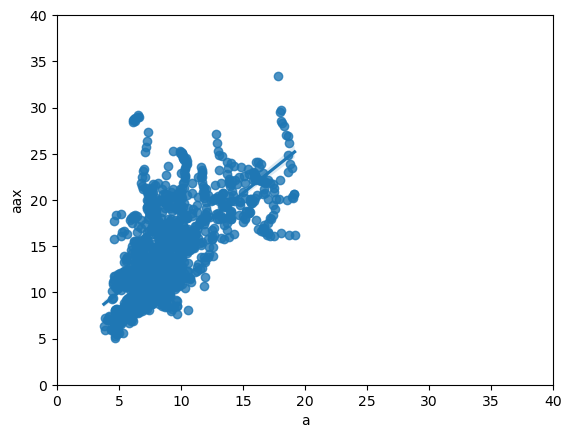

In [88]:
sns.regplot(data=DF2,x='a',y='aax')
#sns.regplot(data=DF2,x='a',y='abar')

plt.ylim(0,40)
plt.xlim(0,40)

<AxesSubplot: xlabel='sepax', ylabel='sarax'>

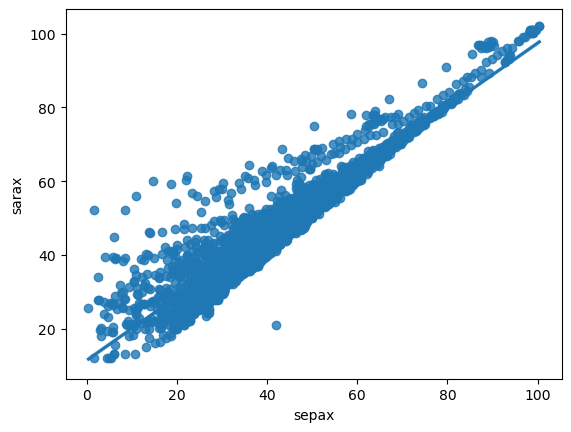

In [57]:
sns.regplot(data=DF2[DF2['gamma']>0],x='sepax',y='sarax')


<AxesSubplot: xlabel='aax', ylabel='Count'>

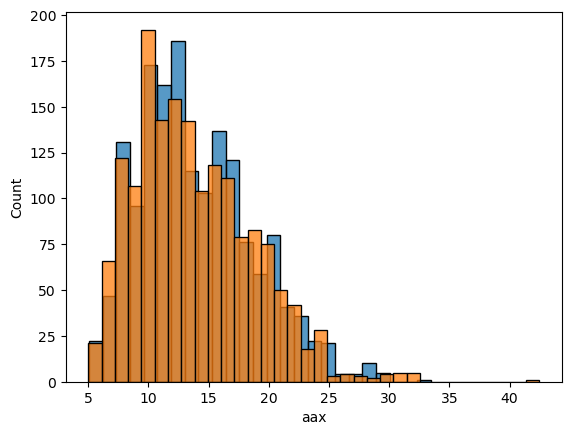

In [93]:
sns.histplot(DF2['aax'])
sns.histplot(DF2['abar'])


In [89]:
from scipy.stats import linregress

# Calcular la pendiente y el coeficiente de correlación
x = DF2['a']
y = DF2['aax']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope,intercept,r_value)

# Calcular la pendiente y el coeficiente de correlación
x = DF2['a']
y = DF2['abar']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope,intercept,r_value)



nan nan nan
0.9002924367247955 5.840053575935463 0.5735392566117095


In [90]:
from scipy.stats import linregress

# Calcular la pendiente y el coeficiente de correlación
x = DF2[DF2['gamma']>0]['a']
y = DF2[DF2['gamma']>0]['aax']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope,intercept,r_value)

# Calcular la pendiente y el coeficiente de correlación
x = DF2[DF2['gamma']>0]['a']
y = DF2[DF2['gamma']>0]['abar']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope,intercept,r_value)

# Calcular la pendiente y el coeficiente de correlación
x = DF2[DF2['gamma']>0]['sepax']
y = DF2[DF2['gamma']>0]['sarax']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope,intercept,r_value)

KeyError: 'gamma'

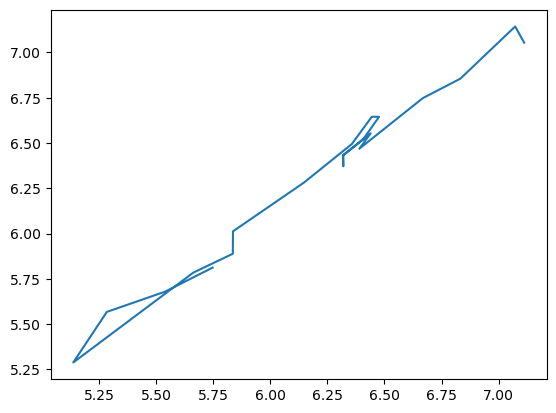

In [22]:
plt.plot(abar,aax)

In [17]:
stp

1

# Gaussfit test

In [1]:
import numpy as np
import scipy.optimize as opt

def gaussian_2d(xy, amp, x0, y0, sigma):
    x, y = xy
    return amp * np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

def fit_magnetic_field_gaussians(B_map):
    """
    Ajusta distribuciones gaussianas 2D a las componentes positiva y negativa
    de un mapa de campo magnético fotosférico.
    
    Parámetros:
        B_map : ndarray
            Mapa 2D del campo magnético.
    
    Retorna:
        params_pos : tuple
            Parámetros ajustados (amp, x0, y0, sigma) para la componente positiva.
        params_neg : tuple
            Parámetros ajustados (amp, x0, y0, sigma) para la componente negativa.
    """
    ny, nx = B_map.shape
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    
    # Extraer las componentes positiva y negativa
    mask_pos = B_map > 0
    mask_neg = B_map < 0
    
    x_pos, y_pos, B_pos = x[mask_pos], y[mask_pos], B_map[mask_pos]
    x_neg, y_neg, B_neg = x[mask_neg], y[mask_neg], np.abs(B_map[mask_neg])
    
    def fit_gaussian(x_data, y_data, B_data):
        if len(B_data) == 0:
            return None
        
        initial_guess = (np.max(B_data), np.mean(x_data), np.mean(y_data), np.std(x_data))
        try:
            params, _ = opt.curve_fit(gaussian_2d, (x_data, y_data), B_data, p0=initial_guess)
            return tuple(params)
        except RuntimeError:
            return None
    
    params_pos = fit_gaussian(x_pos, y_pos, B_pos)
    params_neg = fit_gaussian(x_neg, y_neg, B_neg)
    
    return params_pos, params_neg

In [50]:
pixsize=1.98*725*1000*100
pixarea=pixsize*pixsize
DFs=[]

#for name in ars:
for name in [10050,8552]:
    

    lat=searchar(str(name))[1]
    DF1=pd.read_csv('./posteriors/'+str(name)+'_TM3.csv')
    print(str(name)+'----------------------------------')
    datad,times=opencube2(name=str(name),path='../movies')
    scl=1
    
    
    nn=DF0[DF0['AR']==name].range.values[0]
    sg0=DF0[DF0['AR']==name].sigma.values[0]
    
    mask_cube=np.load('./masks/'+str(name)+'_mask.npy')[:,:,0:nn]
    data2=datad[:,:,0:nn]*mask_cube
    sz2,sz1,nMagnetograms = (np.shape(data2))
    am=[]
    for i in range(nMagnetograms):
        posp,negp=fit_magnetic_field_gaussians(data2[:,:,i])
        if (negp) and (posp):
            am.append(np.mean([posp[3],negp[3]]))
        elif posp:
            am.append(posp[3])
        elif negp:
            am.append(negp[3])

nt -0.33323297
time b'29-Jul-2002 12:47:00.281'
lat -7
10050----------------------------------
147 151 68
b'27-Jul-2002 04:47:00.267' b'31-Jul-2002 17:35:00.299'
78 142
nt -0.1878991
time b'29-May-1999 09:36:03.504'
lat 20
8552----------------------------------
151 195 79
b'26-May-1999 11:12:03.546' b'31-May-1999 20:47:43.000'
87 105


In [55]:
am[-1]

7.0649442406105365

In [56]:
posp[3]

4.460955812138066

In [57]:
negp[3]

9.668932669083008

In [58]:
np.mean([posp[3],negp[3]])

7.0649442406105365